# <font color=darkblue>Credit Card Default Prediction </font>


*Goals:*
* Implementing different Default Credit Card prediction models using Default Credit Card Clients dataset
* Comparing the different models   
* Presenting the most efficient model

## I. Business understanding:

 Our main goal is to Build a good accurate model able to predict default credit card of individual customers to reduce the credit risk ,damage and uncertainty.
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

## II. Data understanding


### Libreries Importation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import sklearn
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = [15, 8]

from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')

### Loading Data 

In [2]:

df = pd.read_csv('Dataset\DefaultofCreditCardClients_Dataset.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.shape

(30000, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
df.rename(columns={"default.payment.next.month":"default"}, inplace=True)
df.rename(columns={"LIMIT_BAL":"limit_bal"}, inplace=True)
df.rename(columns={"SEX":"sex"}, inplace=True)
df.rename(columns={"EDUCATION":"education"}, inplace=True)
df.rename(columns={"MARRIAGE":"marriage"}, inplace=True)
df.rename(columns={"AGE":"age"}, inplace=True)
df.rename(columns={"PAY_0":"pay_1"}, inplace=True)
df.rename(columns={"PAY_2":"pay_2"}, inplace=True)
df.rename(columns={"PAY_3":"pay_3"}, inplace=True)
df.rename(columns={"PAY_4":"pay_4"}, inplace=True)
df.rename(columns={"PAY_5":"pay_5"}, inplace=True)
df.rename(columns={"PAY_6":"pay_6"}, inplace=True)
df.rename(columns={"BILL_AMT1":"bill_amt1"}, inplace=True)
df.rename(columns={"BILL_AMT2":"bill_amt2"}, inplace=True)
df.rename(columns={"BILL_AMT3":"bill_amt3"}, inplace=True)
df.rename(columns={"BILL_AMT4":"bill_amt4"}, inplace=True)
df.rename(columns={"BILL_AMT5":"bill_amt5"}, inplace=True)
df.rename(columns={"BILL_AMT6":"bill_amt6"}, inplace=True)
df.rename(columns={"PAY_AMT1":"pay_amt1"}, inplace=True)
df.rename(columns={"PAY_AMT2":"pay_amt2"}, inplace=True)
df.rename(columns={"PAY_AMT3":"pay_amt3"}, inplace=True)
df.rename(columns={"PAY_AMT4":"pay_amt4"}, inplace=True)
df.rename(columns={"PAY_AMT5":"pay_amt5"}, inplace=True)
df.rename(columns={"PAY_AMT6":"pay_amt6"}, inplace=True)

In [6]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
sex,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
marriage,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
pay_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
pay_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
pay_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
pay_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [7]:
#check missing values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,ID,bill_amt2,pay_amt6,pay_amt5,pay_amt4,pay_amt3,pay_amt2,pay_amt1,bill_amt6,bill_amt5,...,pay_5,pay_4,pay_3,pay_2,pay_1,age,marriage,education,sex,default
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
## Unique values in each categorical columns

print("Sex", df.sex.unique())
print('Education', df.education.unique())
print('Pay_0', df.pay_1.unique())
print('Marriage', df.marriage.unique())
print('Default', df.default.unique())

Sex [2 1]
Education [2 1 3 5 4 6 0]
Pay_0 [ 2 -1  0 -2  1  3  4  8  7  5  6]
Marriage [1 2 3 0]
Default [1 0]


* The EDUCATION column has 7 unique values, but as per our data description, we have only 4 unique values, so we are going to club categories 0, 5, and 6 with category 4

In [9]:
fill = (df.education == 0) | (df.education == 5) | (df.education == 6)
df.loc[fill, 'education'] = 4

In [10]:
#Replace 1 by 0 for male and 2 by 1 in Sex deature
df.sex.replace(1,0,inplace=True)
df.sex.replace(2,1,inplace=True)
print('Sex', df.sex.unique())

Sex [1 0]


In [11]:
df.head()

,ID,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000.0,1,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,1,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,1,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,1,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,0,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


###  EDA


#### Univariate Analysis

In [12]:
## Map categorical data

df.sex = df.sex.map({0:'Male', 1:'Female'})
df.default = df.default.map({0:'No', 1:'Yes'})

df.education = df.education.map({1:'Graduate School',
                                                          2:'University',
                                                          3:'High School',
                                                          4:'Others'})

df.marriage = df.marriage.map({1:'Married',
                                                        2:'Single',
                                                        3:'Divorced',
                                                        0: 'Others'})

In [13]:
df

,ID,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,Male,High School,Married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,No
29996,29997,150000.0,Male,High School,Single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,No
29997,29998,30000.0,Male,University,Single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,Yes
29998,29999,80000.0,Male,High School,Married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,Yes


In [14]:
def plot_categorical_count(df, col, hue=None, hue_order=None, is_pct=True, figsize=(12,6)):
    
    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, hue=hue, hue_order=None)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), va='bottom', ha='center', size=14)
        
    g.spines['top'].set_visible(False)
    g.spines['left'].set_visible(False)
    g.spines['right'].set_visible(False)
    
    plt.show()
    
    if is_pct:
        print()
        print("Percentage share of each category:")
        print(df[col].value_counts(normalize=True)*100)

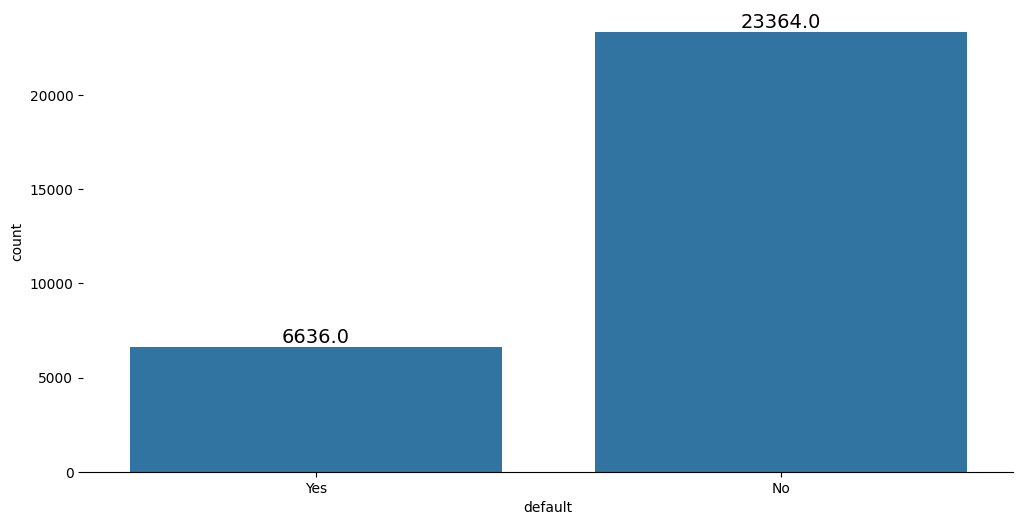


Percentage share of each category:
default
No     77.88
Yes    22.12
Name: proportion, dtype: float64


In [15]:
plot_categorical_count(df, 'default')

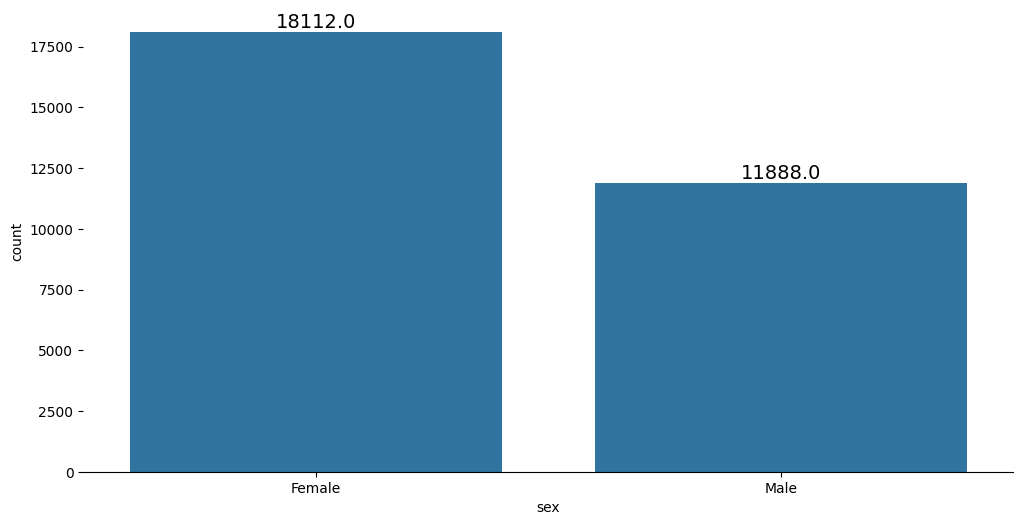


Percentage share of each category:
sex
Female    60.373333
Male      39.626667
Name: proportion, dtype: float64


In [16]:
plot_categorical_count(df, 'sex')

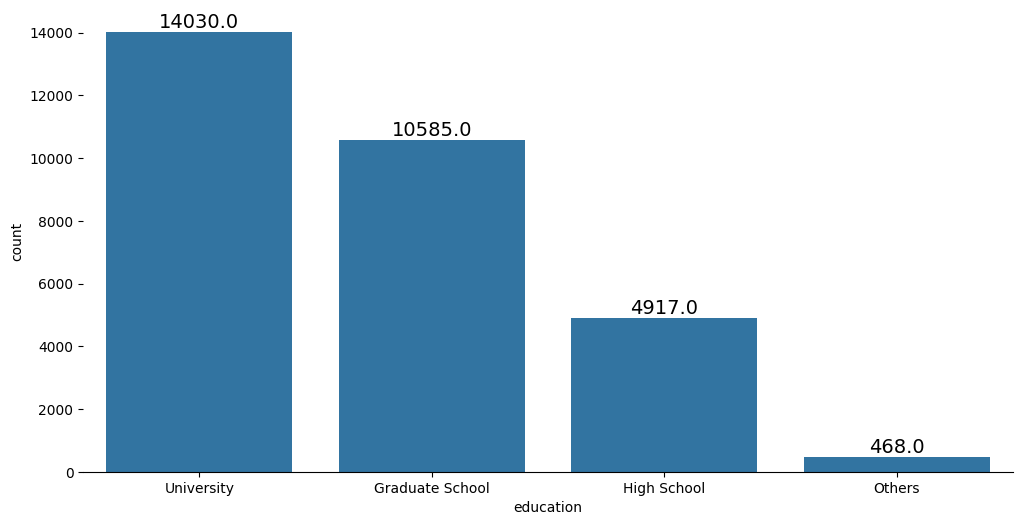


Percentage share of each category:
education
University         46.766667
Graduate School    35.283333
High School        16.390000
Others              1.560000
Name: proportion, dtype: float64


In [17]:
plot_categorical_count(df, 'education')

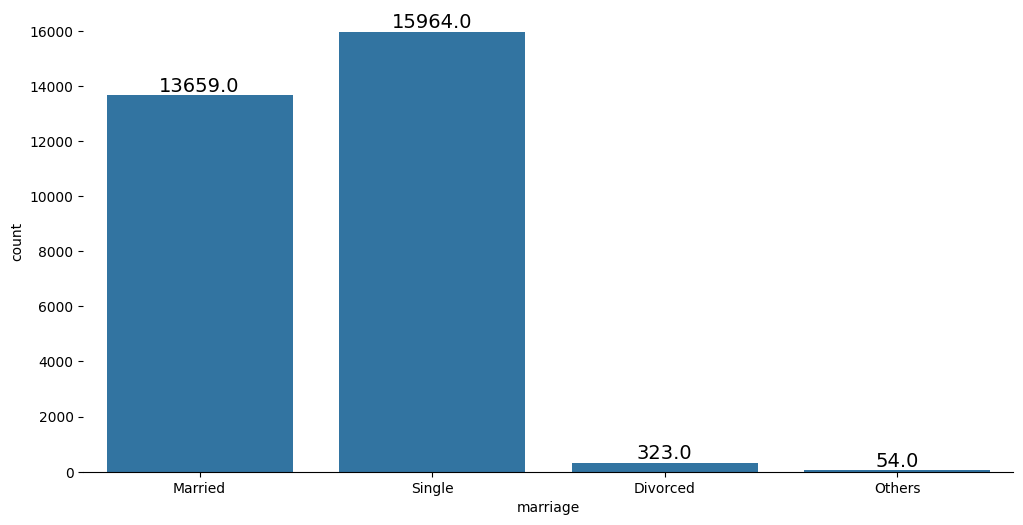


Percentage share of each category:
marriage
Single      53.213333
Married     45.530000
Divorced     1.076667
Others       0.180000
Name: proportion, dtype: float64


In [18]:
plot_categorical_count(df, 'marriage')

#### Bivariate Analysis

In [19]:
def default_df(df, col):
    df1 = pd.crosstab(index=df[col], columns=df.default, margins=True)
    df1.rename(columns={'No':'total_no_default', 'Yes':'total_yes_default', 'All':'total_default'}, inplace=True)
    
    df2 = pd.crosstab(index=df[col], columns=df.default, normalize='index', margins=True)
    df2.rename(columns={'No':'pct_no_default', 'Yes':'pct_yes_default'}, inplace=True)

    df3=pd.crosstab(index=df[col], columns=df.default, normalize='all', margins=True)
    df3.rename(columns={'No':'pct_total_no_default', 'Yes':'pct_total_yes_default'}, inplace=True)
    final_df = pd.concat([df1, df2,df3], axis=1)
    
    return final_df

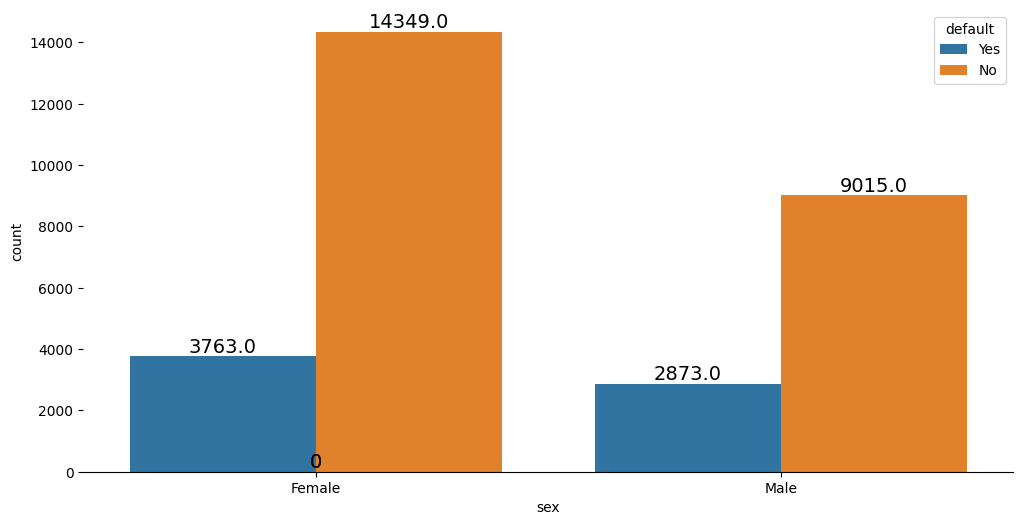

In [20]:
plot_categorical_count(df, col='sex', hue='default', is_pct=False)

In [21]:
default_df(df, 'sex').drop(labels='All', axis=0).sort_values(by=['pct_total_yes_default','pct_yes_default'],ascending=False)

default,total_no_default,total_yes_default,total_default,pct_no_default,pct_yes_default,pct_total_no_default,pct_total_yes_default,All
sex,,,,,,,,
Female,14349,3763,18112,0.792237,0.207763,0.4783,0.125433,0.603733
Male,9015,2873,11888,0.758328,0.241672,0.3005,0.095767,0.396267


- around 24% of male customers have defaulted and around 20% of female customers have defaulted.

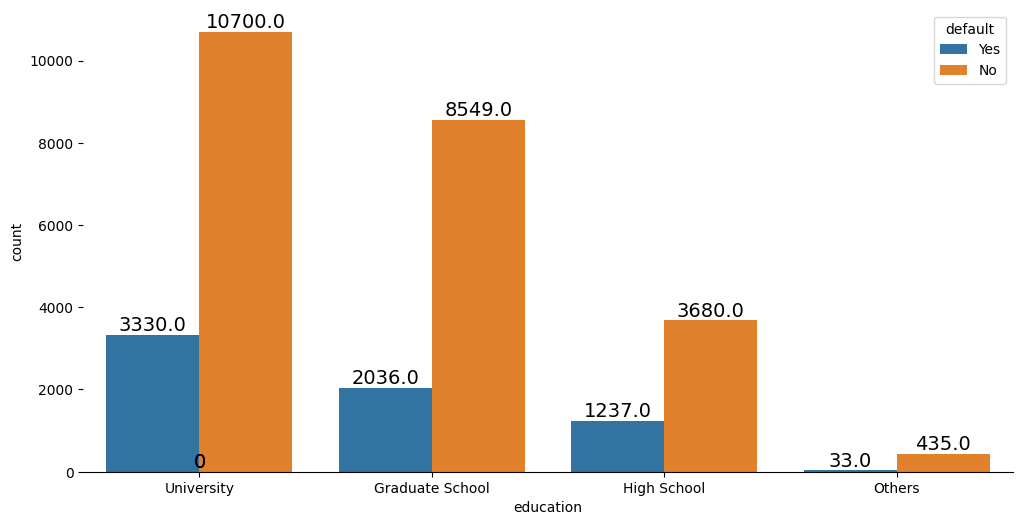

default,total_no_default,total_yes_default,total_default,pct_no_default,pct_yes_default,pct_total_no_default,pct_total_yes_default,All
education,,,,,,,,
High School,3680,1237,4917,0.748424,0.251576,0.122667,0.041233,0.163900
University,10700,3330,14030,0.762651,0.237349,0.356667,0.111000,0.467667
All,23364,6636,30000,0.778800,0.221200,0.778800,0.221200,1.000000
Graduate School,8549,2036,10585,0.807652,0.192348,0.284967,0.067867,0.352833
Others,435,33,468,0.929487,0.070513,0.014500,0.001100,0.015600


In [22]:
plot_categorical_count(df, col='education', hue='default', is_pct=False)

default_df(df, 'education').sort_values(by='pct_yes_default',ascending=False)

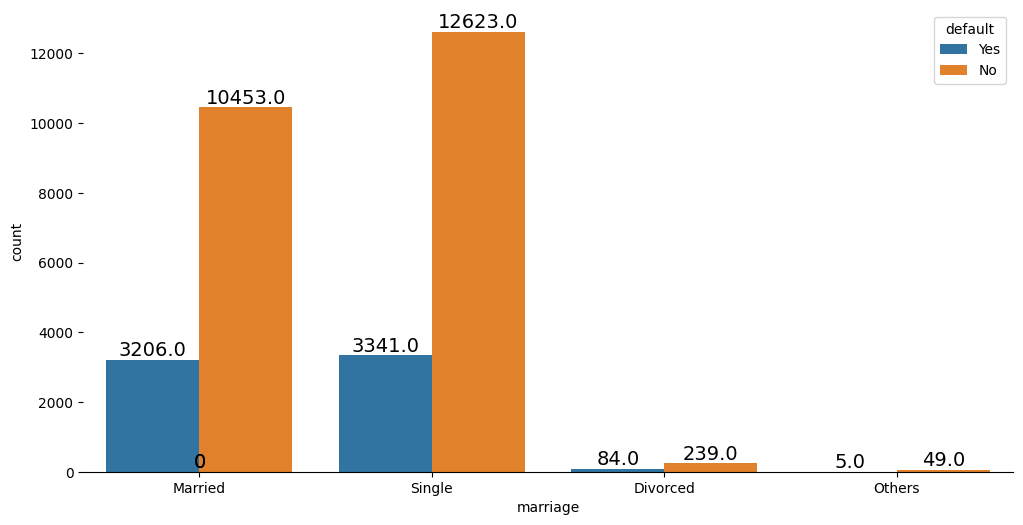

default,total_no_default,total_yes_default,total_default,pct_no_default,pct_yes_default,pct_total_no_default,pct_total_yes_default,All
marriage,,,,,,,,
Divorced,239,84,323,0.739938,0.260062,0.007967,0.002800,0.010767
Married,10453,3206,13659,0.765283,0.234717,0.348433,0.106867,0.455300
Others,49,5,54,0.907407,0.092593,0.001633,0.000167,0.001800
Single,12623,3341,15964,0.790717,0.209283,0.420767,0.111367,0.532133
All,23364,6636,30000,0.778800,0.221200,0.778800,0.221200,1.000000


In [23]:
plot_categorical_count(df, col='marriage', hue='default', is_pct=False)

default_df(df, 'marriage')

In [24]:
pd.crosstab(df.pay_1, df.default, margins=True)

default,No,Yes,All
pay_1,,,
-2,2394,365,2759
-1,4732,954,5686
0,12849,1888,14737
1,2436,1252,3688
2,823,1844,2667
3,78,244,322
4,24,52,76
5,13,13,26
6,5,6,11


In [25]:
default_df(df, 'pay_1').sort_values(by='pct_total_yes_default',ascending=False)

default,total_no_default,total_yes_default,total_default,pct_no_default,pct_yes_default,pct_total_no_default,pct_total_yes_default,All
pay_1,,,,,,,,
All,23364,6636,30000,0.778800,0.221200,0.778800,0.221200,1.000000
0,12849,1888,14737,0.871887,0.128113,0.428300,0.062933,0.491233
2,823,1844,2667,0.308586,0.691414,0.027433,0.061467,0.088900
1,2436,1252,3688,0.660521,0.339479,0.081200,0.041733,0.122933
-1,4732,954,5686,0.832219,0.167781,0.157733,0.031800,0.189533
-2,2394,365,2759,0.867706,0.132294,0.079800,0.012167,0.091967
3,78,244,322,0.242236,0.757764,0.002600,0.008133,0.010733
4,24,52,76,0.315789,0.684211,0.000800,0.001733,0.002533
5,13,13,26,0.500000,0.500000,0.000433,0.000433,0.000867


- we can see that the maximum count of defaults falls under subcategory 2: a payment delay for the last 2 months. This implies that a customer who has missed payments for 2 continuous months has a high probability of default.

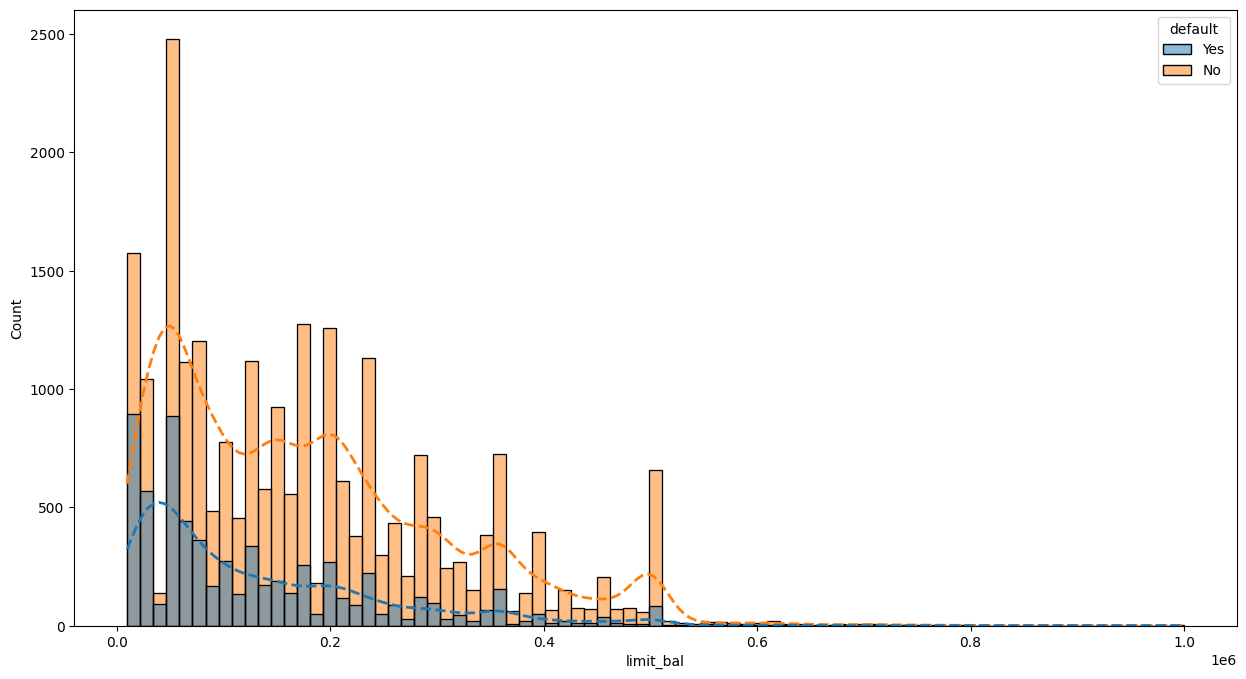

In [26]:
## Balance Limit

sns.histplot(data=df, x='limit_bal', hue='default', 
             kde=True, line_kws={'ls':'--', 'lw':2})
plt.show()

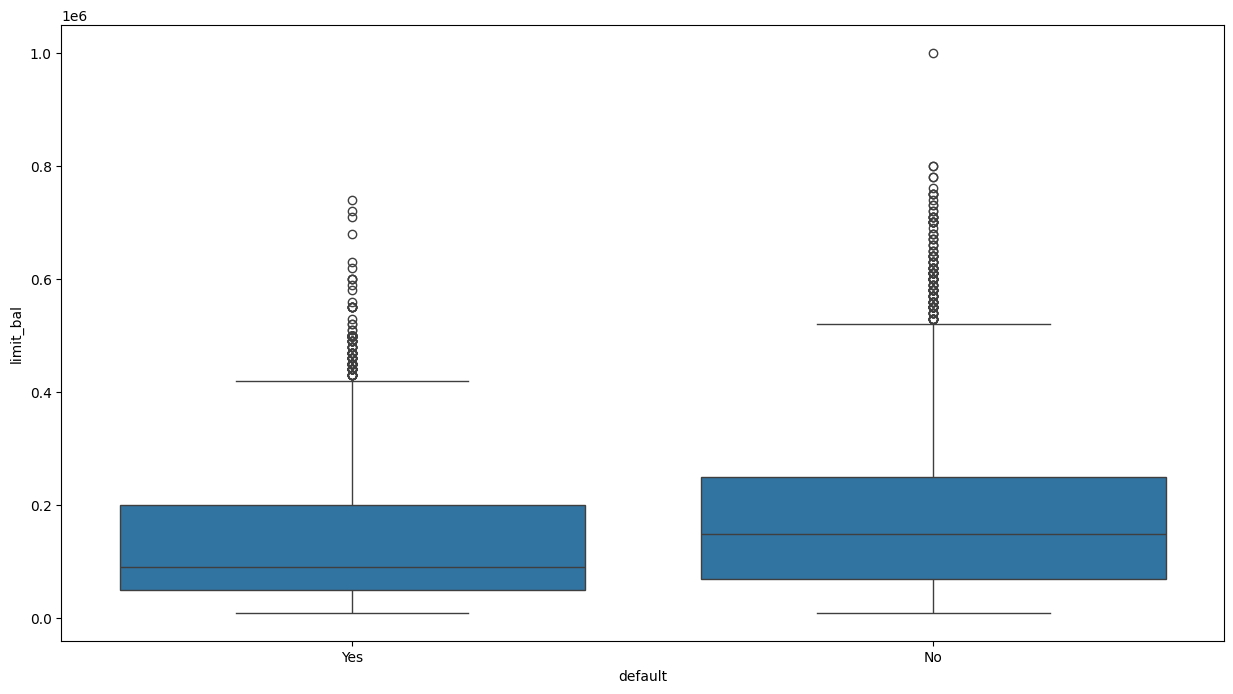

In [27]:
sns.boxplot(data=df, x='default', y='limit_bal')
plt.show()

In [28]:
df.groupby('default')['limit_bal'].agg(['mean', 'median', 'std'])

,mean,median,std
default,,,
No,178099.726074,150000.0,131628.359660
Yes,130109.656420,90000.0,115378.540571


In [29]:
## hypothesis test to check whether average balance for dafaulters and non-defaulters are same

res = stats.ttest_ind(df.limit_bal.loc[df.default=='Yes'], 
                df.limit_bal.loc[df.default=='No'])

print(f"P-Value: {res[1]:.3f}")

P-Value: 0.000


- we can infer that customers with higher balances have a lower likelihood of default than customers with lower balance amounts.

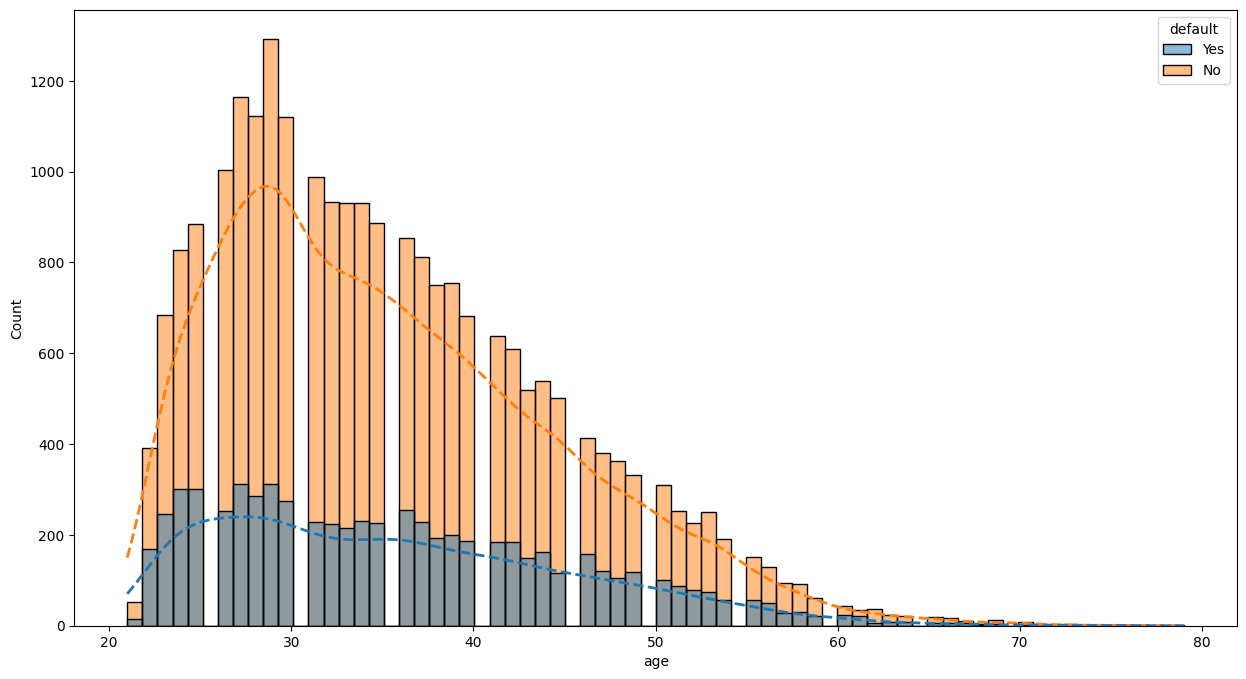

In [30]:
## Age 

sns.histplot(data=df, x='age', hue='default', 
            kde=True, line_kws={'ls':'--', 'lw':2})
plt.show()

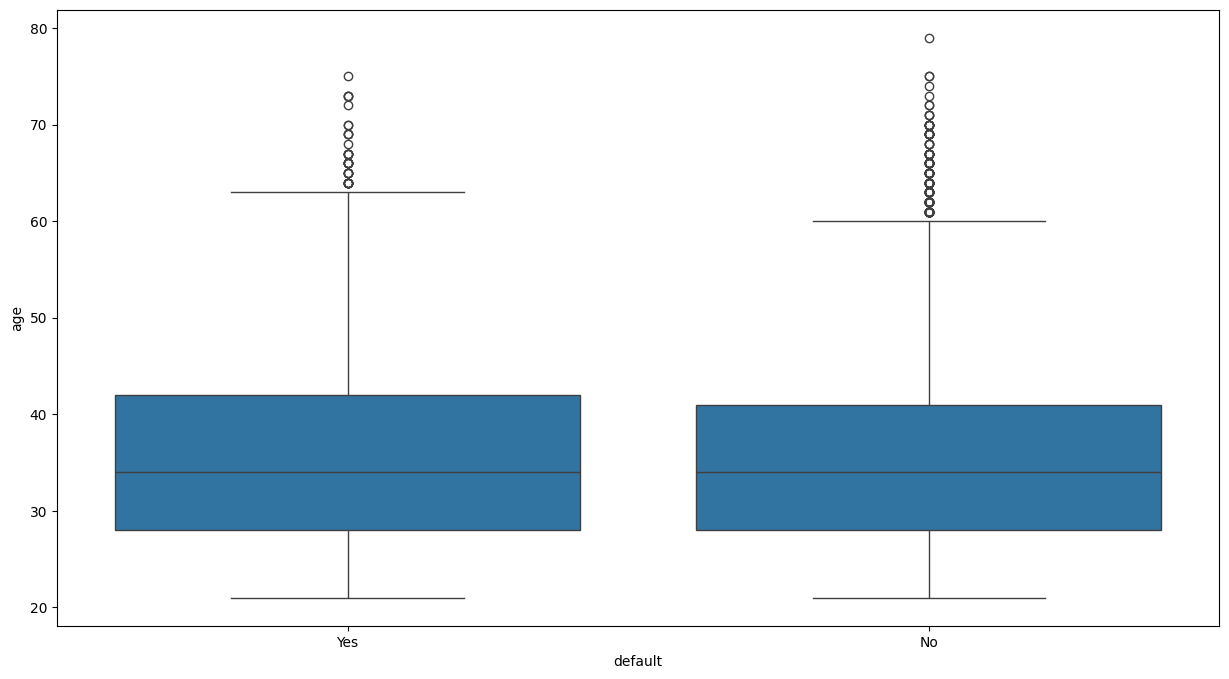

In [31]:
sns.boxplot(data=df, x='default', y='age')
plt.show()

In [32]:
## hypothesis test to check whether average age for dafaulters and non-defaulters are same

res = stats.ttest_ind(df.age.loc[df.default=='Yes'], 
                df.age.loc[df.default=='No'])

print(f"P-Value: {res[1]:.3f}")

P-Value: 0.016


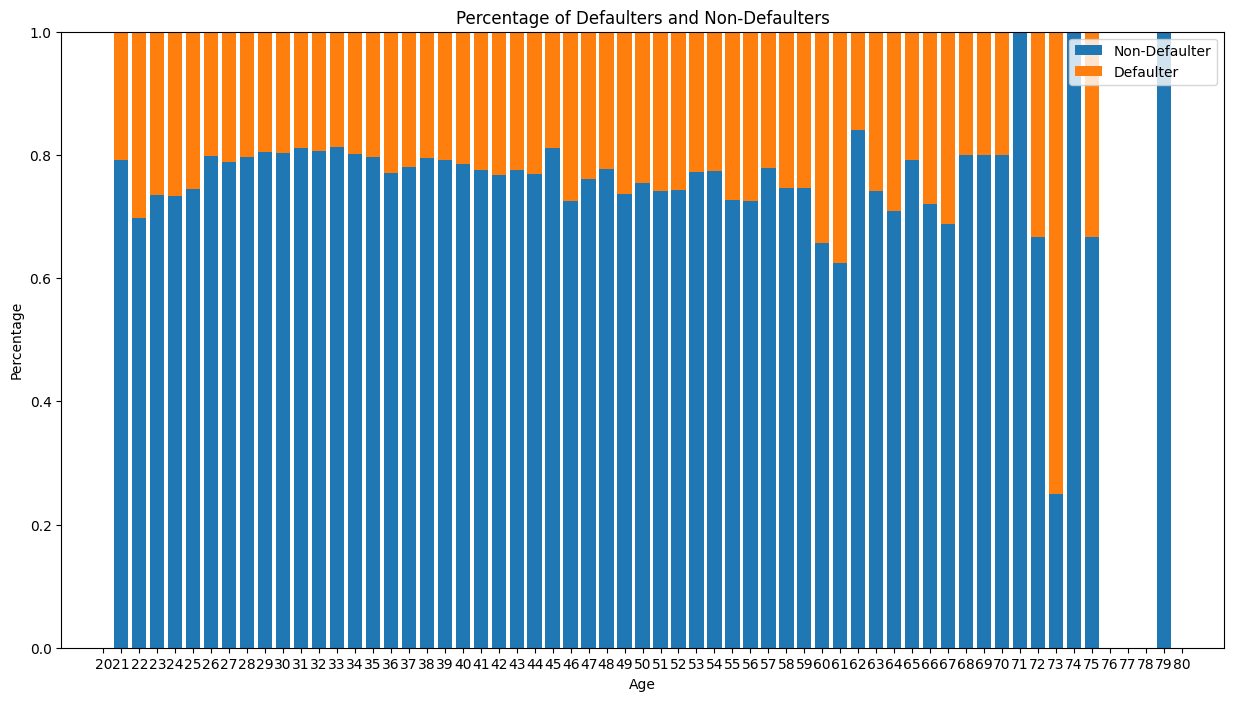

In [33]:
age_df = pd.crosstab(df.age, df.default, normalize='index')

plt.bar(x=age_df.index, height=age_df.No, label='Non-Defaulter')
plt.bar(x=age_df.index, height=age_df.Yes, bottom=age_df.No, label='Defaulter')

plt.xticks(ticks=range(20,81))
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.title("Percentage of Defaulters and Non-Defaulters")

plt.legend()
plt.show()

#### NB: People with high pay amount in month September are less likely to default than people with less pay amount.

Pearson vs Spearman correlation?
Both Pearson and Spearman are used for measuring the correlation but the difference between them lies in the kind of analysis we want.

Pearson correlation: Pearson correlation evaluates the linear relationship between two continuous variables.

Spearman correlation: Spearman correlation evaluates the monotonic relationship. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

In [34]:
df

,ID,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,Male,High School,Married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,No
29996,29997,150000.0,Male,High School,Single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,No
29997,29998,30000.0,Male,University,Single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,Yes
29998,29999,80000.0,Male,High School,Married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,Yes


In [35]:
numerical_columns = [
    "limit_bal", "age", "pay_1", "pay_2", "pay_3", "pay_4", "pay_5", "pay_6",
    "bill_amt1", "bill_amt2", "bill_amt3", "bill_amt4", "bill_amt5", "bill_amt6",
    "pay_amt1", "pay_amt2", "pay_amt3", "pay_amt4", "pay_amt5", "pay_amt6"
]

<Axes: >

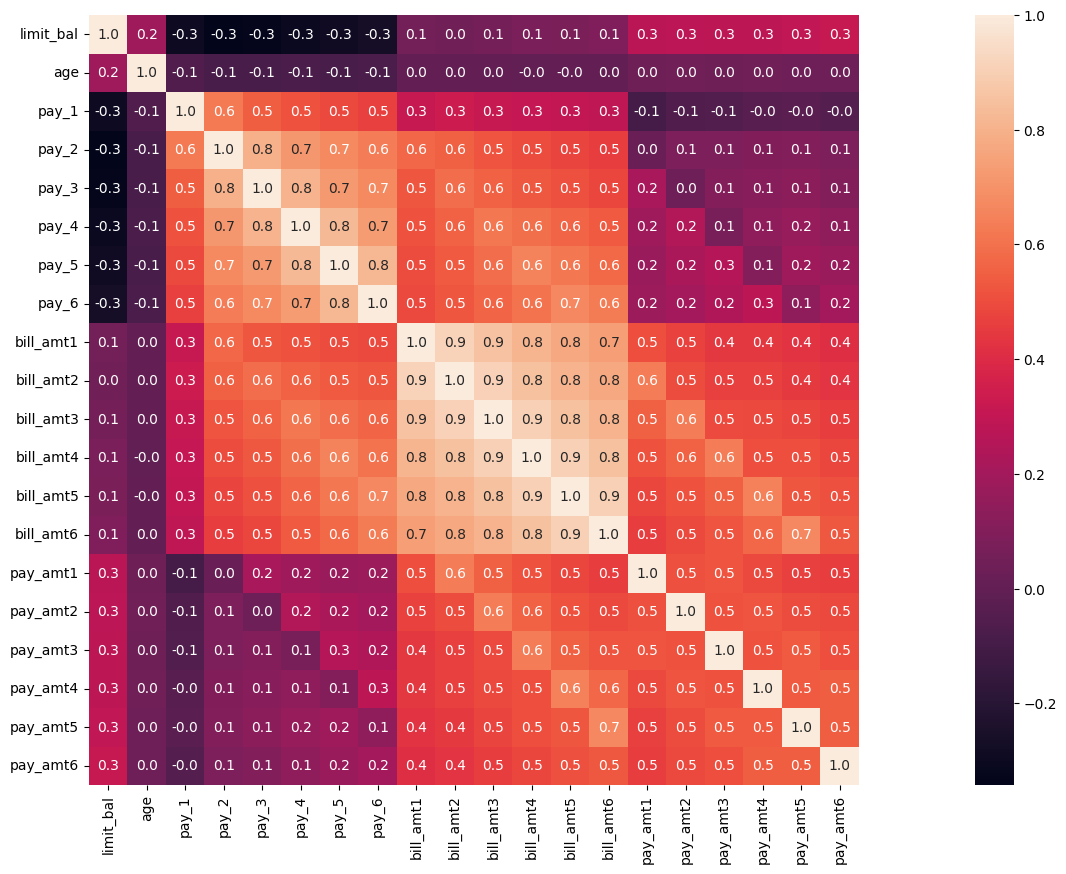

In [36]:
corr = df[numerical_columns].corr(method='spearman')
plt.subplots(figsize=(30,10))
sns.heatmap( corr, square=True, annot=True, fmt=".1f" )

We can clearly i see a high coorealatiion between the bill_amt features and we can see also moderately correlated between pay_amt and bills amt 
and the reason of this correlation is :
it seems that it goes like that:

I have a BILL of X, I pay Y

The month after I have to pay X-Y + X', being X' my new expenses, I pay Y'

The month after I have to pay X+X' - Y - Y' + X'' , I pay Y''

So on so forth

On top of that I may or may not have months of delay.

It seems that if by september I have a bill too close to my limit, I generally fail. However, I can already see some dramatic exceptions.

Moreover, I can spot some clients that joined our dataset at a later month: they have 0 in BILL and PAY AMT for a while and then they start. I have to keep that in mind as well.

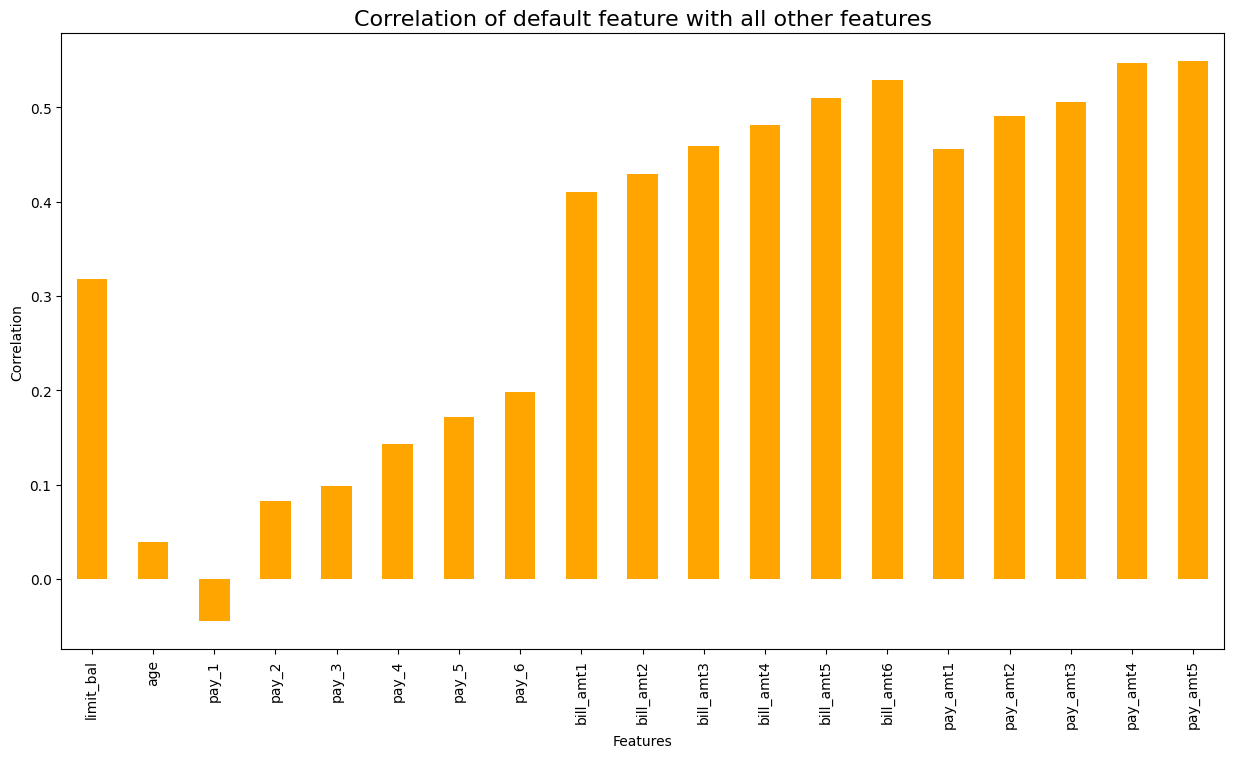

In [37]:
corr_matrix=df[numerical_columns].corr(method='spearman')
corr_matrix.iloc[:-1, -1].plot.bar(color='orange')
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.title("Correlation of default feature with all other features", fontdict={'size':16})
plt.show()


### Building a Profile of a High-Risk Customer

- A male customer is more likely to default than a female customer.
- People with a relationship status of divorced are more likely to default than married or single people.
- The Paymenet in September is the most feature corrolated to default.
- We can see that the count of {3,4,5,6,7,8} in the pay_i is too low and with a high probability of default so we will delete the rows with those records to maintain more accuracy to the model. 
- A customer whose highest educational qualification is a high-school diploma is more likely to default than a customer who has gone to graduate school or university.
- A customer who has delayed payment for 2 consecutive months has a higher probability of default.
- A customer who is 22 years of age has a higher probability of defaulting on payments than any other age group.
- Bill_amt feautures are highly corrolated to eachothers which will let's us transform it to one feature. 
- The Pay_amt feautures are moderatly corrolated with the bill_amt features. 
- We will transfor the sex feature to {0,1} instead of {1,2} so it will be a binary feature.
- The education feature and the Mariage feature will convert from categorical data into dummy or indicator variables.




## III. Data preparation 


In [38]:
df = pd.read_csv('Dataset\DefaultofCreditCardClients_Dataset.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [39]:
df.rename(columns={"default.payment.next.month":"default"}, inplace=True)
df.rename(columns={"LIMIT_BAL":"limit_bal"}, inplace=True)
df.rename(columns={"SEX":"sex"}, inplace=True)
df.rename(columns={"EDUCATION":"education"}, inplace=True)
df.rename(columns={"MARRIAGE":"marriage"}, inplace=True)
df.rename(columns={"AGE":"age"}, inplace=True)
df.rename(columns={"PAY_0":"pay_1"}, inplace=True)
df.rename(columns={"PAY_2":"pay_2"}, inplace=True)
df.rename(columns={"PAY_3":"pay_3"}, inplace=True)
df.rename(columns={"PAY_4":"pay_4"}, inplace=True)
df.rename(columns={"PAY_5":"pay_5"}, inplace=True)
df.rename(columns={"PAY_6":"pay_6"}, inplace=True)
df.rename(columns={"BILL_AMT1":"bill_amt1"}, inplace=True)
df.rename(columns={"BILL_AMT2":"bill_amt2"}, inplace=True)
df.rename(columns={"BILL_AMT3":"bill_amt3"}, inplace=True)
df.rename(columns={"BILL_AMT4":"bill_amt4"}, inplace=True)
df.rename(columns={"BILL_AMT5":"bill_amt5"}, inplace=True)
df.rename(columns={"BILL_AMT6":"bill_amt6"}, inplace=True)
df.rename(columns={"PAY_AMT1":"pay_amt1"}, inplace=True)
df.rename(columns={"PAY_AMT2":"pay_amt2"}, inplace=True)
df.rename(columns={"PAY_AMT3":"pay_amt3"}, inplace=True)
df.rename(columns={"PAY_AMT4":"pay_amt4"}, inplace=True)
df.rename(columns={"PAY_AMT5":"pay_amt5"}, inplace=True)
df.rename(columns={"PAY_AMT6":"pay_amt6"}, inplace=True)

In [40]:
fill = (df.education == 0) | (df.education == 5) | (df.education == 6)
df.loc[fill, 'education'] = 4

In [41]:
#Replace 1 by 0 for male and 2 by 1 in Sex deature
df.sex.replace(1,0,inplace=True)
df.sex.replace(2,1,inplace=True)
print('Sex', df.sex.unique())

Sex [1 0]


In [42]:
df.sex=df.sex.astype('category')
df.education=df.education.astype('category')
df.marriage=df.marriage.astype('category')


In [43]:
df.pay_2.value_counts()

pay_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64

In [44]:
rows_pay = df.apply(lambda x: True if x['pay_1']>=3 or x['pay_2']>=3 or x['pay_3']>=3 or x['pay_4']>=3 or x['pay_5']>=3 or x['pay_6']>=3 else False , axis=1)
rows_pay_count = len(rows_pay[rows_pay == True].index)
print("number of rows that have values higher or equal to 3", rows_pay_count)

number of rows that have values higher or equal to 3 1193


In [45]:
pay = ['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']
for pay_i in pay:
  df.drop(df.loc[df[pay_i]>=3].index, inplace = True)
print('Pay_1', df.pay_1.unique())
print('Pay_2', df.pay_2.unique())
print('Pay_3', df.pay_3.unique())
print('Pay_4', df.pay_4.unique())
print('Pay_5', df.pay_5.unique())
print('Pay_6', df.pay_6.unique())

Pay_1 [ 2 -1  0 -2  1]
Pay_2 [ 2  0 -1 -2  1]
Pay_3 [-1  0  2 -2  1]
Pay_4 [-1  0 -2  2  1]
Pay_5 [-2  0 -1  2]
Pay_6 [-2  2  0 -1]


#### Handeling Correlation in bill_amt features using PCA

<Axes: >

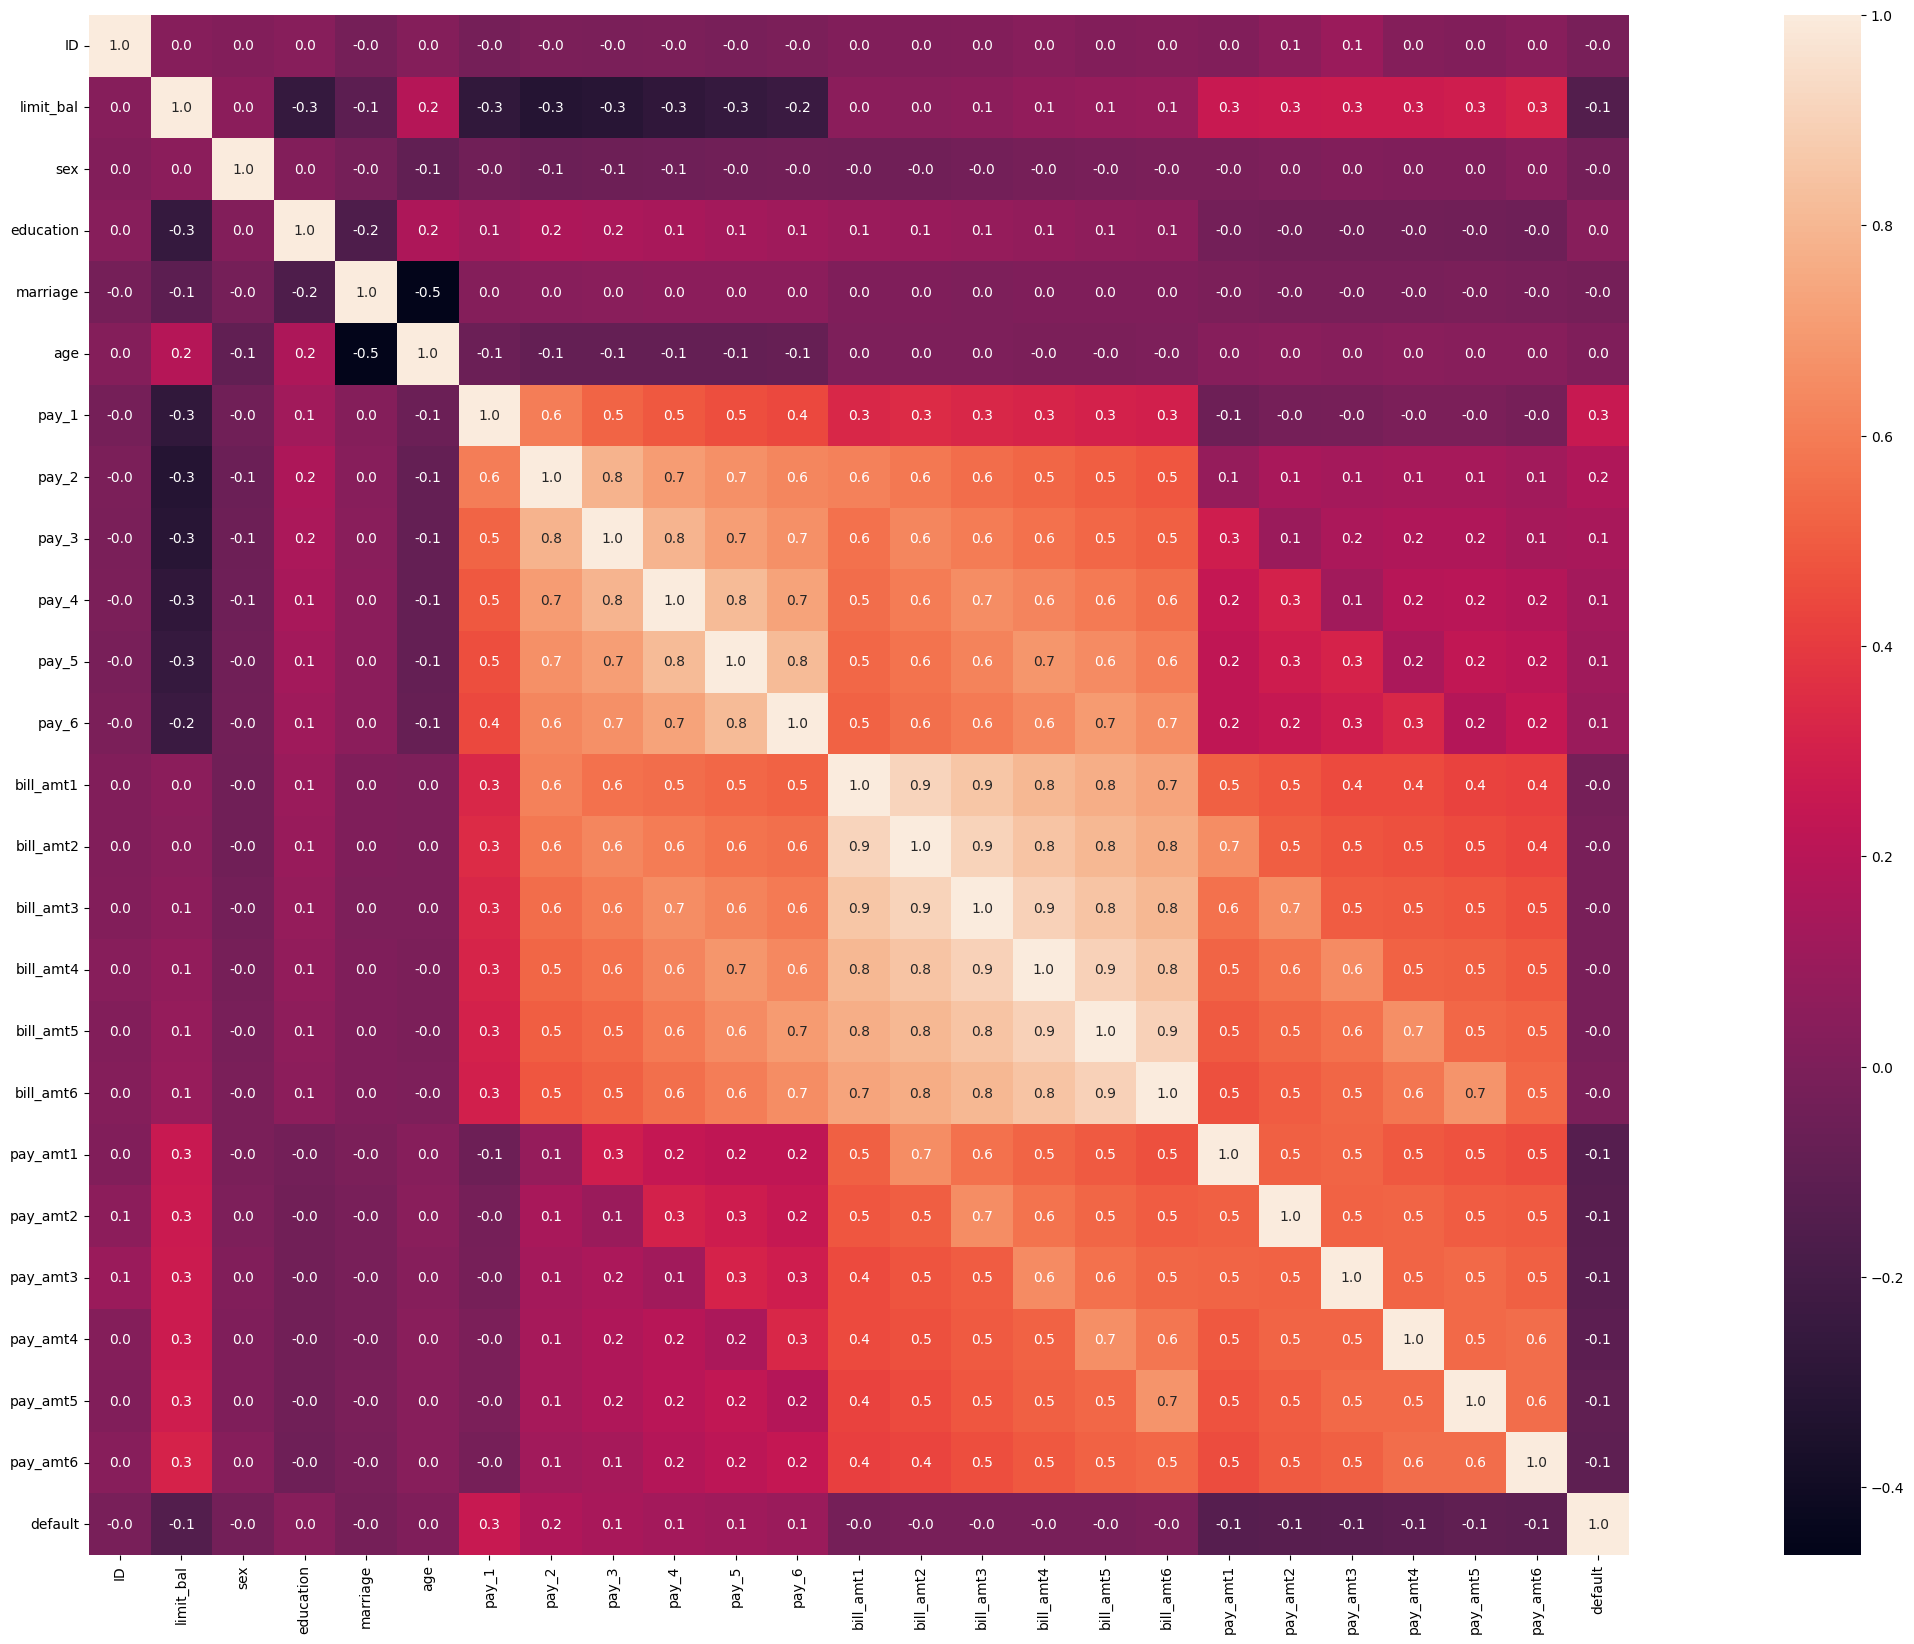

In [46]:
#Visulize Corrolation Between features
corr = df.corr('spearman')
plt.subplots(figsize=(40,20))
sns.heatmap( corr, square=True, annot=True, fmt=".1f" )

As we can see in this heatmap and as we mentioned in previous EDA, bill_atm's features are highly Correlated. 
So in order to optimize our features we opted for PCA 

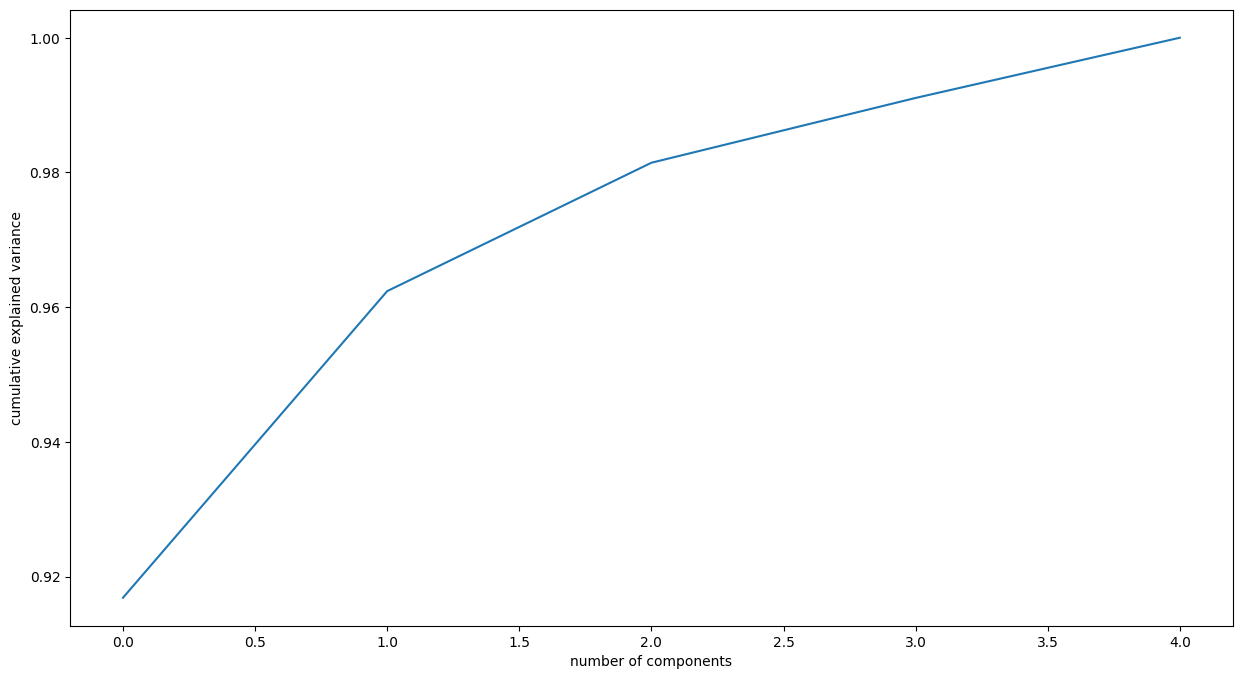

In [47]:
pca = PCA().fit(df[['bill_amt1','bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5']])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


As the plot showed, 2 components explains around 98% variance in bill_atm Features which is good as a result.

In [48]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df[['bill_amt1','bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5']])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['bill_amt_pc1', 'bill_amt_pc2'])
principalDf

,bill_amt_pc1,bill_amt_pc2
0,-100597.890600,2175.120155
1,-98205.344672,-2647.580963
2,-65400.030529,4877.007163
3,-12776.030391,9851.602188
4,-64645.048788,-17770.483482
...,...,...
28802,69040.058400,-19795.982589
28803,223808.899418,100865.613177
28804,-95176.010101,-6847.800561
28805,-5781.767430,-12358.801174


In [49]:
df_dep=df.copy()
df.drop(columns=['bill_amt1','bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5','bill_amt6'],inplace=True)

In [50]:
df = pd.concat([df,principalDf], axis = 1)

In [51]:
df = df[['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'bill_amt_pc1',
       'bill_amt_pc2', 'default']]


In [52]:
df

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,bill_amt_pc1,bill_amt_pc2,default
0,20000.0,1,2,1,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,0.0,689.0,0.0,0.0,0.0,0.0,-100597.890600,2175.120155,1.0
1,120000.0,1,2,2,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,-98205.344672,-2647.580963,1.0
2,90000.0,1,2,2,34.0,0.0,0.0,0.0,0.0,0.0,0.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,-65400.030529,4877.007163,0.0
3,50000.0,1,2,1,37.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,-12776.030391,9851.602188,0.0
4,50000.0,0,2,1,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,-64645.048788,-17770.483482,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-104277.947553,-1166.446117,NaN
28661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150220.708617,-28740.063265,NaN
28711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-69318.140269,-6794.699361,NaN
28747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158244.769526,14568.712770,NaN


### Handeling duplicates

<Axes: title={'center': 'duplicates in features'}, ylabel='Nb'>

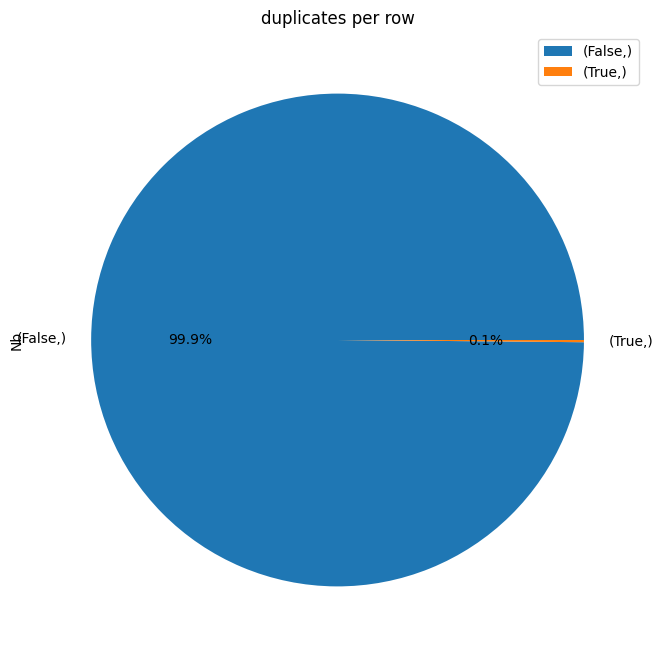

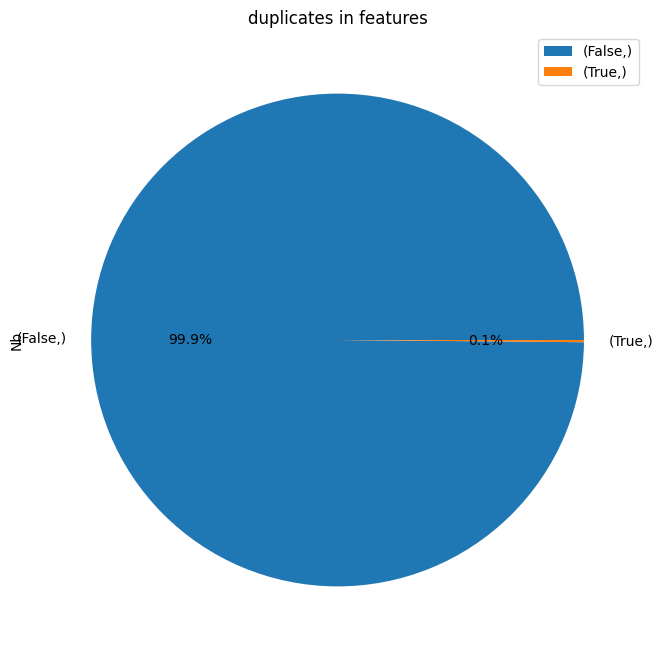

In [53]:
#check for duplicates per row: features + target
df.duplicated(keep='first').to_frame(name='isduplicated').value_counts().to_frame(name='Nb').plot.pie(y='Nb',autopct='%1.1f%%',title='duplicates per row')
#check for duplicates in features
df.iloc[:, :-1].duplicated(keep='first').to_frame(name='isduplicated').value_counts().to_frame(name='Nb').plot.pie(y='Nb',autopct='%1.1f%%',title='duplicates in features')

In [54]:
#remove duplicates per row
df.drop_duplicates(inplace=True)
#remove duplicates in features
col = df.iloc[:,:-1].columns
df.drop_duplicates(subset=col,keep='first',inplace=True,ignore_index=True)

In [55]:
df=df.dropna()

### Dummies Variables

In [56]:
#get dummies for education and marriage
df_dc = pd.get_dummies(df, columns=['education','marriage'],drop_first=True)
df_dc

,limit_bal,sex,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt1,...,pay_amt6,bill_amt_pc1,bill_amt_pc2,default,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3
0,20000.0,1,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,0.0,...,0.0,-100597.890600,2175.120155,1.0,True,False,False,True,False,False
1,120000.0,1,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,0.0,...,2000.0,-98205.344672,-2647.580963,1.0,True,False,False,False,True,False
2,90000.0,1,34.0,0.0,0.0,0.0,0.0,0.0,0.0,1518.0,...,5000.0,-65400.030529,4877.007163,0.0,True,False,False,False,True,False
3,50000.0,1,37.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,...,1000.0,-12776.030391,9851.602188,0.0,True,False,False,True,False,False
4,50000.0,0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,2000.0,...,679.0,-64645.048788,-17770.483482,0.0,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27675,140000.0,1,34.0,-1.0,-1.0,-2.0,-2.0,-1.0,0.0,0.0,...,1000.0,69040.058400,-19795.982589,0.0,False,False,False,False,True,False
27676,360000.0,1,29.0,0.0,0.0,0.0,0.0,0.0,0.0,10256.0,...,12000.0,223808.899418,100865.613177,0.0,False,False,False,False,True,False
27677,360000.0,1,36.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,...,0.0,-95176.010101,-6847.800561,0.0,False,False,False,True,False,False
27678,390000.0,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,6645.0,...,7422.0,-5781.767430,-12358.801174,0.0,False,False,True,False,True,False


In [57]:
df_dc = df_dc[['limit_bal', 'sex', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5',
       'pay_amt6', 'bill_amt_pc1', 'bill_amt_pc2', 'education_2',
       'education_3', 'education_4', 'marriage_1', 'marriage_2', 'marriage_3', 'default']]

In [58]:
df_dc

,limit_bal,sex,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt1,...,pay_amt6,bill_amt_pc1,bill_amt_pc2,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3,default
0,20000.0,1,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,0.0,...,0.0,-100597.890600,2175.120155,True,False,False,True,False,False,1.0
1,120000.0,1,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,0.0,...,2000.0,-98205.344672,-2647.580963,True,False,False,False,True,False,1.0
2,90000.0,1,34.0,0.0,0.0,0.0,0.0,0.0,0.0,1518.0,...,5000.0,-65400.030529,4877.007163,True,False,False,False,True,False,0.0
3,50000.0,1,37.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,...,1000.0,-12776.030391,9851.602188,True,False,False,True,False,False,0.0
4,50000.0,0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,2000.0,...,679.0,-64645.048788,-17770.483482,True,False,False,True,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27675,140000.0,1,34.0,-1.0,-1.0,-2.0,-2.0,-1.0,0.0,0.0,...,1000.0,69040.058400,-19795.982589,False,False,False,False,True,False,0.0
27676,360000.0,1,29.0,0.0,0.0,0.0,0.0,0.0,0.0,10256.0,...,12000.0,223808.899418,100865.613177,False,False,False,False,True,False,0.0
27677,360000.0,1,36.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,...,0.0,-95176.010101,-6847.800561,False,False,False,True,False,False,0.0
27678,390000.0,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,6645.0,...,7422.0,-5781.767430,-12358.801174,False,False,True,False,True,False,0.0


### Handeling Data unbalance

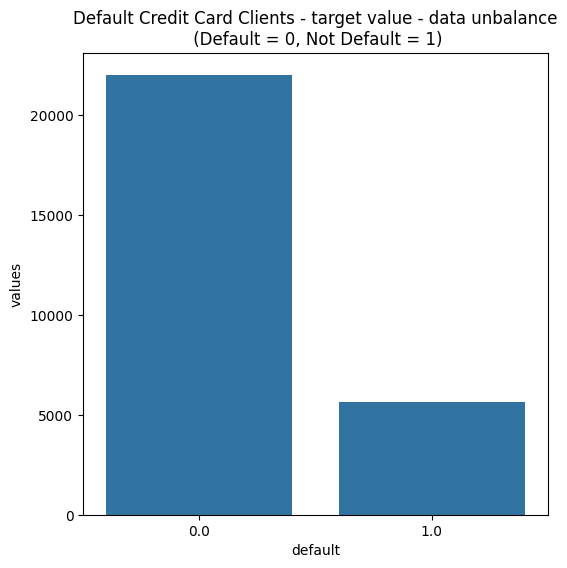

balance Ratio: 25.70


In [59]:
# Check Data unbalance
temp = df_dc["default"].value_counts()
df_ud = pd.DataFrame({'default': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default', y="values", data=df_ud)
locs, labels = plt.xticks()
plt.show()
print('balance Ratio:',"{:.2f}".format(df_ud['values'].min()/df_ud['values'].max()*100))

**Imbalanced datasets** mean that the number of observations differs for the classes in a classification dataset. This imbalance can lead to inaccurate results especially  for a predictive model.
an ideal balanced dataset will have 1:1 ratio of class distrubution 

As we can see, our data is inbalanced with balance ratio equales to 25.67

In [60]:
from sklearn.utils import resample

In [61]:
features=['limit_bal', 'sex', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5',
       'pay_amt6', 'bill_amt_pc1', 'bill_amt_pc2', 'education_2',
       'education_3', 'education_4', 'marriage_1', 'marriage_2', 'marriage_3']
y = df_dc['default'].copy() # target
X = df_dc[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [62]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)
df_train.sample(10)

,limit_bal,sex,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt1,...,pay_amt6,bill_amt_pc1,bill_amt_pc2,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3,default
3087,20000.0,0,30.0,1.0,2.0,2.0,2.0,2.0,0.0,2000.0,...,397.0,211242.577846,-28094.814455,False,False,False,True,False,False,1.0
14761,160000.0,1,33.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20415.0,...,1456.0,-18423.836566,15609.731802,False,False,False,True,False,False,0.0
12371,80000.0,0,25.0,0.0,0.0,0.0,0.0,0.0,-1.0,1456.0,...,5500.0,129420.090321,6086.855961,True,False,False,False,True,False,0.0
19774,200000.0,0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,2374.0,...,461.0,-90231.429983,-6454.478112,False,False,False,False,True,False,0.0
17134,100000.0,0,29.0,2.0,0.0,0.0,0.0,0.0,2.0,2600.0,...,6100.0,-102977.583072,-2060.522604,True,False,False,False,True,False,1.0
18991,20000.0,1,43.0,0.0,0.0,0.0,0.0,0.0,0.0,1600.0,...,1780.0,-40768.243324,14338.022871,False,True,False,True,False,False,0.0
3746,200000.0,1,37.0,-1.0,0.0,0.0,0.0,0.0,0.0,4220.0,...,2295.0,-89948.799166,339.725953,False,False,False,True,False,False,0.0
24545,150000.0,1,32.0,2.0,0.0,0.0,0.0,0.0,2.0,1887.0,...,2088.0,59997.719381,24593.212612,False,False,False,False,True,False,0.0
4857,80000.0,0,30.0,2.0,2.0,2.0,0.0,0.0,2.0,10895.0,...,3100.0,-91753.701267,-3302.277783,True,False,False,False,True,False,1.0
16541,50000.0,1,29.0,0.0,0.0,0.0,0.0,0.0,0.0,2500.0,...,3000.0,181573.950785,233123.781059,False,True,False,False,True,False,0.0


In [63]:
from sklearn.utils import resample

In [64]:
# Separate majority and minority classes
df_majority = df_train[df_train.default==0]
df_minority = df_train[df_train.default==1]

print(df_majority.default.count())
print("-----------")
print(df_minority.default.count())
print("-----------")
print(df_train.default.value_counts())

17603
-----------
4541
-----------
default
0.0    17603
1.0     4541
Name: count, dtype: int64


In [65]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=17603,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.default.value_counts()

default
0.0    17603
1.0    17603
Name: count, dtype: int64

In [66]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=4541,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.default.value_counts()

default
0.0    4541
1.0    4541
Name: count, dtype: int64

So now we have 3 training sets:

* X_train, y_train, with their unbalance and their authenticity.
* df_upsample, which is balanced but at overfitting risk.
* df_downsample, which will be fast but also potentially useless in terms of predictability (the test set is even bigger than it).


## IV. Modeling 
#### Explain and justify the choice, parameterization and testing of different algorithms

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier

In [68]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

### K-nearest neighbor

#### Simples Training dataset
Manhattan distance is a good measure to use because our  data are not of the same type (example: Age, sex, bill_pay, etc ...).

Text(0, 0.5, 'Accuracy')

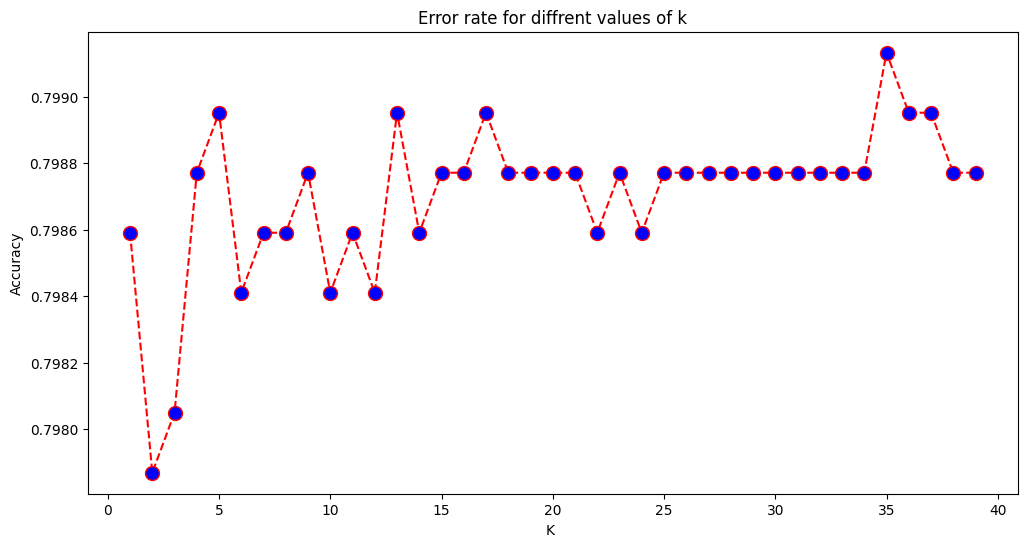

In [69]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(knn_model.score(X_test, y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error rate for diffrent values of k')
plt.xlabel('K ')
plt.ylabel('Accuracy')

In [70]:
knn = KNeighborsClassifier(n_neighbors= 25,metric='manhattan')
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print('training Error for K-nearest neighbor '+ ": {:.2f}".format(1-knn.score(X_train,y_train)))
print('validation Error for K-nearest neighbor '+ ": {:.2f}".format(1-knn.score(X_test,y_test)))

training Error for K-nearest neighbor : 0.17
validation Error for K-nearest neighbor : 0.20


In [71]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      4418
         1.0       1.00      0.00      0.01      1118

    accuracy                           0.80      5536
   macro avg       0.90      0.50      0.45      5536
weighted avg       0.84      0.80      0.71      5536



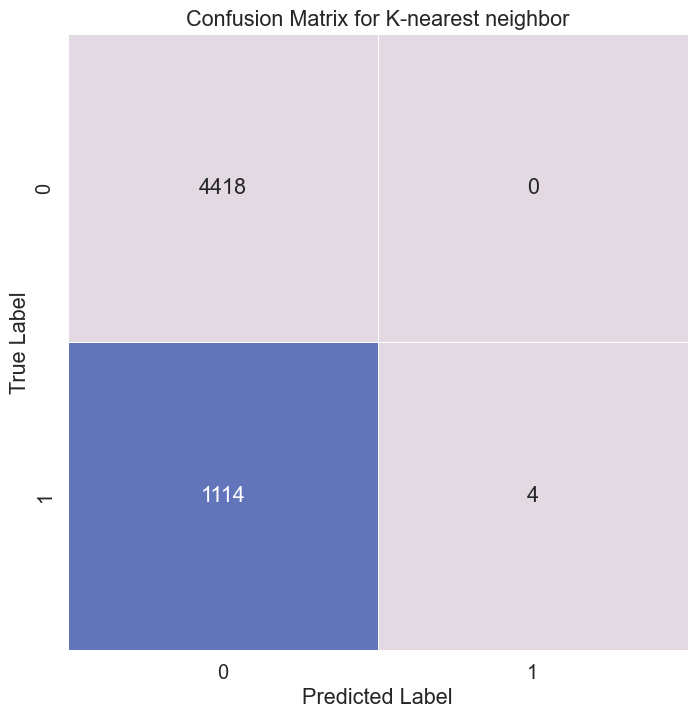

In [72]:

# Plot confusion matrix for LR.
lda_matrix = confusion_matrix(y_test,knn_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(lda_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for K-nearest neighbor');

#### UpSamples dataset

In [73]:
y_upsampled = df_upsampled.default
X_upsampled = df_upsampled.drop(['default'], axis= 1)

Text(0, 0.5, 'Accuracy')

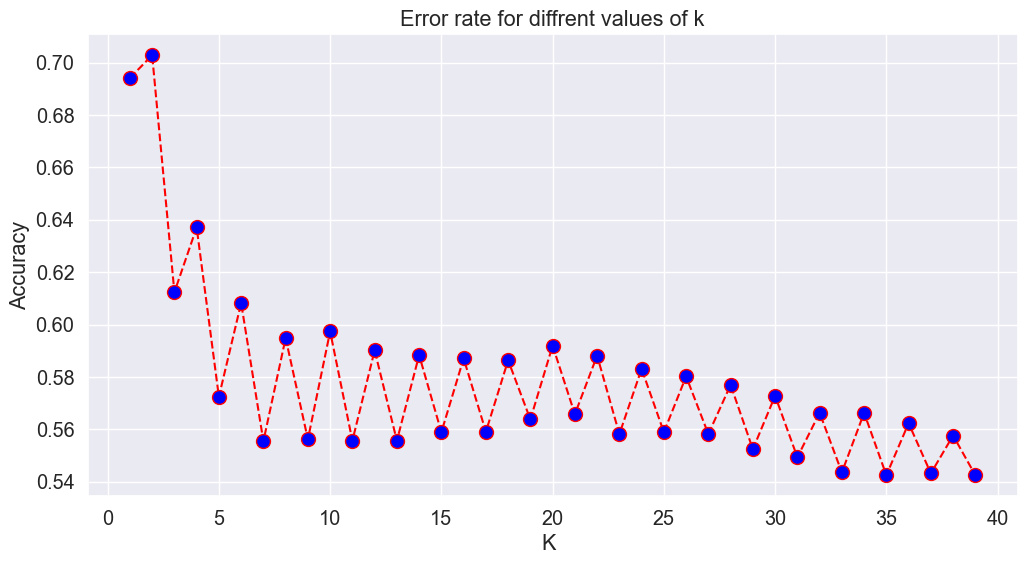

In [74]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_upsampled , y_upsampled )
    pred_i = knn_model.predict(X_test)
    error.append(knn_model.score(X_test, y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error rate for diffrent values of k')
plt.xlabel('K ')
plt.ylabel('Accuracy')

In [75]:
knn = KNeighborsClassifier(n_neighbors= 25,metric='manhattan')
knn.fit(X_upsampled,y_upsampled)
knn_pred=knn.predict(X_test)
print('training Error for K-nearest neighbor '+ ": {:.2f}".format(1-knn.score(X_upsampled,y_upsampled)))
print('validation Error for K-nearest neighbor '+ ": {:.2f}".format(1-knn.score(X_test,y_test)))

training Error for K-nearest neighbor : 0.34
validation Error for K-nearest neighbor : 0.44


In [76]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.56      0.67      4418
         1.0       0.24      0.54      0.33      1118

    accuracy                           0.56      5536
   macro avg       0.53      0.55      0.50      5536
weighted avg       0.71      0.56      0.60      5536



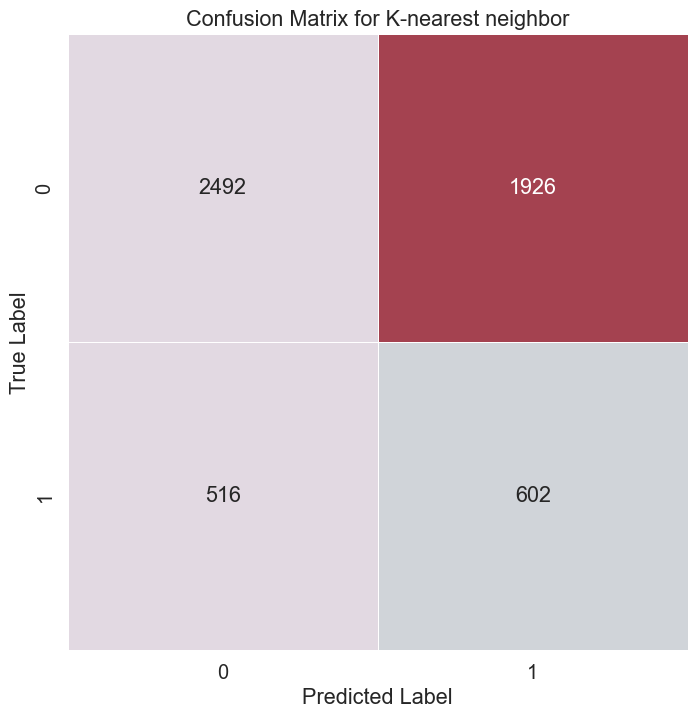

In [77]:
# Plot confusion matrix for LR.
lda_matrix = confusion_matrix(y_test,knn_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(lda_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for K-nearest neighbor');

#### DownSamples dataset

In [78]:
y_downsampled = df_downsampled.default
X_downsampled = df_downsampled.drop(['default'], axis = 1)

Text(0, 0.5, 'Accuracy')

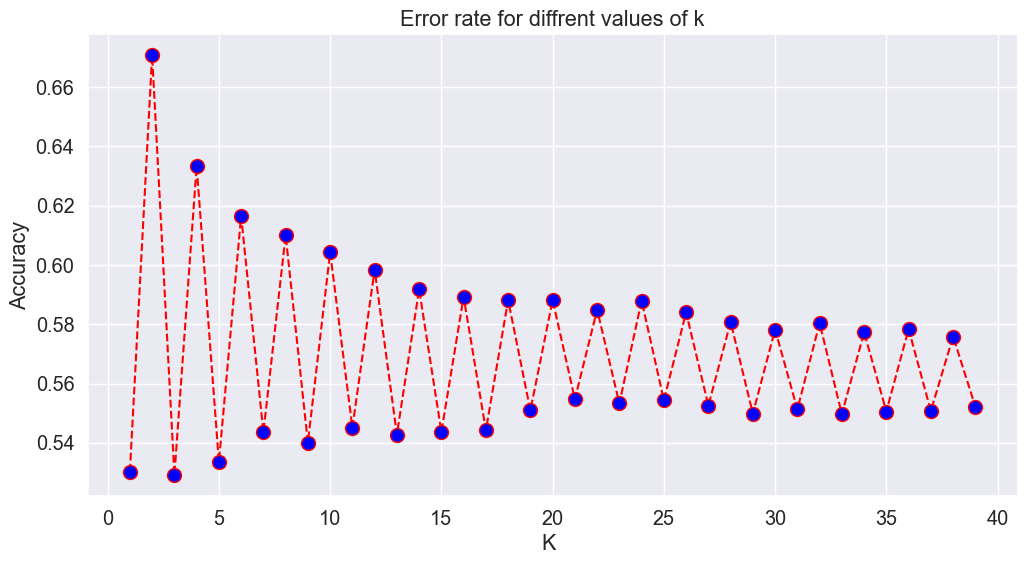

In [79]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_downsampled , y_downsampled )
    pred_i = knn_model.predict(X_test)
    error.append(knn_model.score(X_test, y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error rate for diffrent values of k')
plt.xlabel('K ')
plt.ylabel('Accuracy')

In [80]:
knn = KNeighborsClassifier(n_neighbors= 25,metric='manhattan')
knn.fit(X_downsampled,y_downsampled)
knn_pred=knn.predict(X_test)
print('training Error for K-nearest neighbor '+ ": {:.2f}".format(1-knn.score(X_downsampled,y_downsampled)))
print('validation Error for K-nearest neighbor '+ ": {:.2f}".format(1-knn.score(X_test,y_test)))

training Error for K-nearest neighbor : 0.37
validation Error for K-nearest neighbor : 0.45


In [81]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.54      0.66      4418
         1.0       0.25      0.60      0.35      1118

    accuracy                           0.55      5536
   macro avg       0.55      0.57      0.51      5536
weighted avg       0.72      0.55      0.60      5536



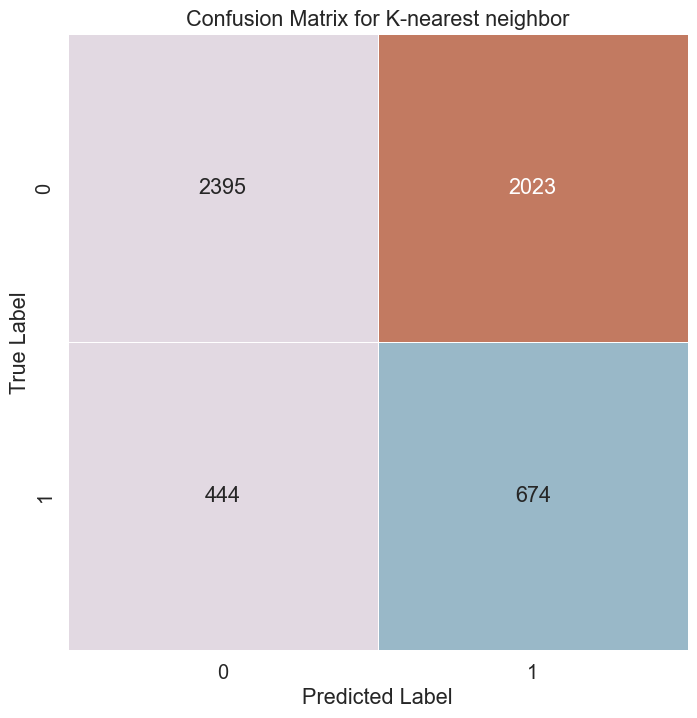

In [82]:
# Plot confusion matrix for KNN.
lda_matrix = confusion_matrix(y_test,knn_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(lda_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for K-nearest neighbor');

For the case the k-nearst neighbor the best training set is the simple dataset

### Logistic Regression

#### Simples training dataset

In [83]:
#LR
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR_pred=LR.predict(X_test)
print('training Error for Logistic Regression '+ ": {:.2f}".format(1-LR.score(X_train,y_train)))
print('validation Error for Logistic Regression '+ ": {:.2f}".format(1-LR.score(X_test,y_test)))

training Error for Logistic Regression : 0.18
validation Error for Logistic Regression : 0.20


In [84]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      4418
         1.0       0.00      0.00      0.00      1118

    accuracy                           0.80      5536
   macro avg       0.40      0.50      0.44      5536
weighted avg       0.64      0.80      0.71      5536



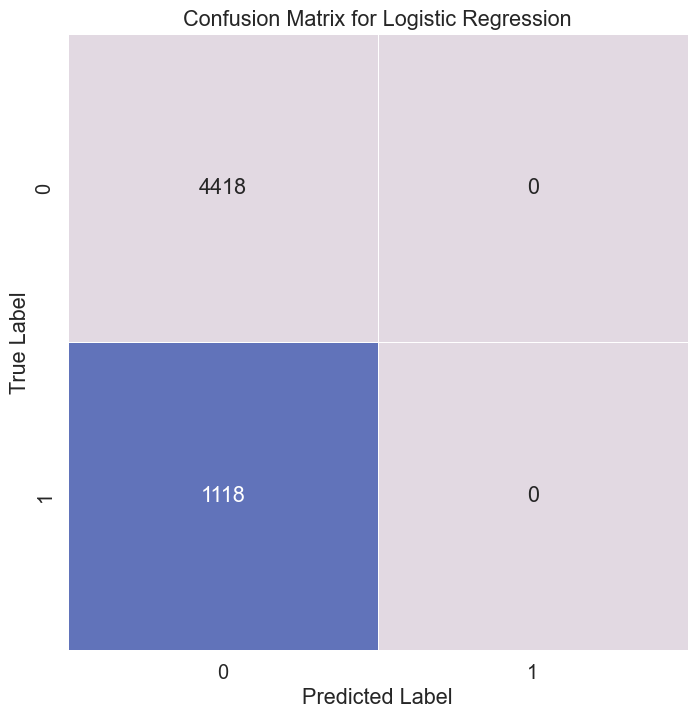

In [85]:
# Plot confusion matrix for LR.
lda_matrix = confusion_matrix(y_test,LR_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(lda_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression');

#### UpSamples dataset

In [86]:
#LR
LR = LogisticRegression()
LR.fit(X_upsampled,y_upsampled)
LR_pred=LR.predict(X_test)
print('training Error for Logistic Regression '+ ": {:.2f}".format(1-LR.score(X_upsampled,y_upsampled)))
print('validation Error for Logistic Regression '+ ": {:.2f}".format(1-LR.score(X_test,y_test)))

training Error for Logistic Regression : 0.41
validation Error for Logistic Regression : 0.46


In [87]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.50      0.63      4418
         1.0       0.26      0.69      0.37      1118

    accuracy                           0.54      5536
   macro avg       0.56      0.59      0.50      5536
weighted avg       0.74      0.54      0.58      5536



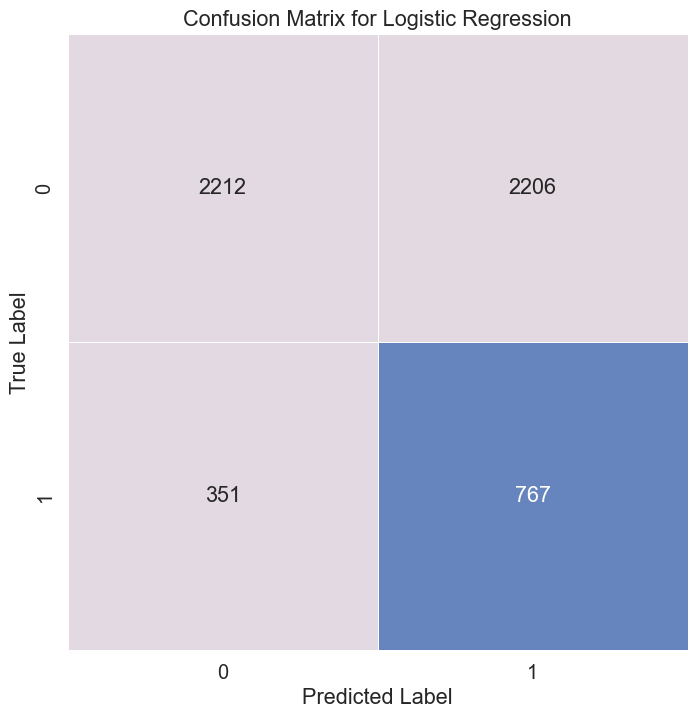

In [88]:
# Plot confusion matrix for LR.
lda_matrix = confusion_matrix(y_test,LR_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(lda_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression');

#### DownSample dataset

In [89]:
#LR
LR = LogisticRegression()
LR.fit(X_downsampled,y_downsampled)
LR_pred=LR.predict(X_test)
print('training Error for Logistic Regression '+ ": {:.2f}".format(1-LR.score(X_downsampled,y_downsampled)))
print('validation Error for Logistic Regression '+ ": {:.2f}".format(1-LR.score(X_test,y_test)))

training Error for Logistic Regression : 0.41
validation Error for Logistic Regression : 0.47


In [90]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.49      0.63      4418
         1.0       0.26      0.69      0.37      1118

    accuracy                           0.53      5536
   macro avg       0.56      0.59      0.50      5536
weighted avg       0.74      0.53      0.58      5536



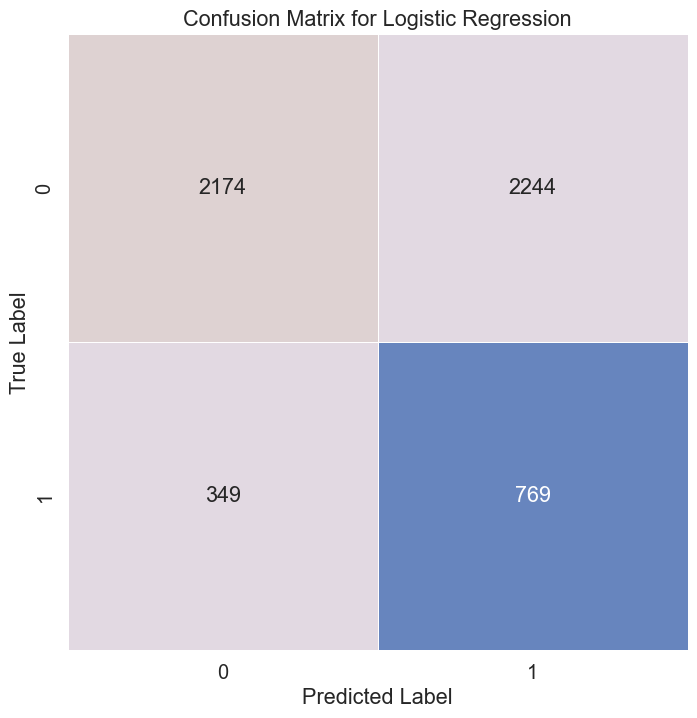

In [91]:
# Plot confusion matrix for LR.
lda_matrix = confusion_matrix(y_test,LR_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(lda_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression');

For the case the logitic regression the best training set is the simple dataset

### Discriminant analysis

#### Simple training dataset

In [92]:
#LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred=lda.predict(X_test)
print('training Error for Discriminant analysis '+ ": {:.2f}".format(1-lda.score(X_train,y_train)))
print('validation Error for Discriminant analysis '+ ": {:.2f}".format(1-lda.score(X_test,y_test)))

training Error for Discriminant analysis : 0.18
validation Error for Discriminant analysis : 0.20


In [93]:
print(classification_report(y_test,lda_pred))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      4418
         1.0       0.00      0.00      0.00      1118

    accuracy                           0.80      5536
   macro avg       0.40      0.50      0.44      5536
weighted avg       0.64      0.80      0.71      5536



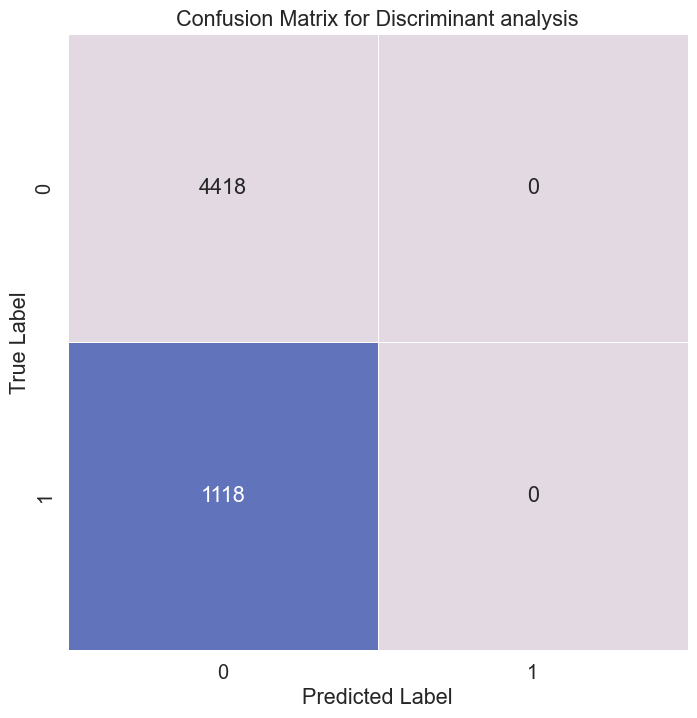

In [94]:
# Plot confusion matrix for lda.
lda_matrix = confusion_matrix(y_test,lda_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(lda_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Discriminant analysis');

#### UpSample dataset

In [95]:
#LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_upsampled, y_upsampled)
lda_pred=lda.predict(X_test)
print('training Error for Discriminant analysis '+ ": {:.2f}".format(1-lda.score(X_upsampled,y_upsampled)))
print('validation Error for Discriminant analysis '+ ": {:.2f}".format(1-lda.score(X_test,y_test)))

training Error for Discriminant analysis : 0.36
validation Error for Discriminant analysis : 0.35


In [96]:
print(classification_report(y_test,lda_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.65      0.75      4418
         1.0       0.32      0.64      0.42      1118

    accuracy                           0.65      5536
   macro avg       0.60      0.65      0.59      5536
weighted avg       0.76      0.65      0.68      5536



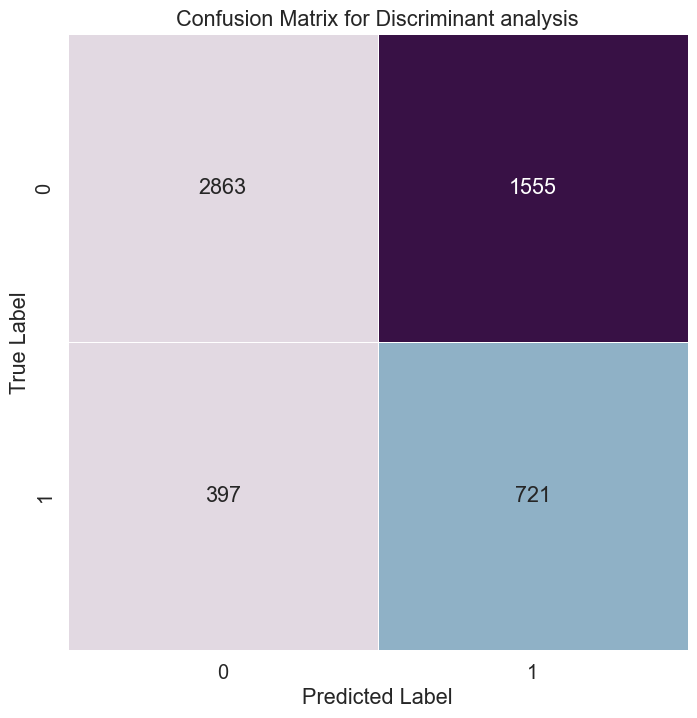

In [97]:
# Plot confusion matrix for lda.
lda_matrix = confusion_matrix(y_test,lda_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(lda_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Discriminant analysis');

#### DownSample dataset

In [98]:
#LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_downsampled, y_downsampled)
lda_pred=lda.predict(X_test)
print('training Error for Discriminant analysis '+ ": {:.2f}".format(1-lda.score(X_downsampled,y_downsampled)))
print('validation Error for Discriminant analysis '+ ": {:.2f}".format(1-lda.score(X_test,y_test)))

training Error for Discriminant analysis : 0.35
validation Error for Discriminant analysis : 0.35


In [99]:
print(classification_report(y_test,lda_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.65      0.75      4418
         1.0       0.32      0.65      0.43      1118

    accuracy                           0.65      5536
   macro avg       0.60      0.65      0.59      5536
weighted avg       0.77      0.65      0.68      5536



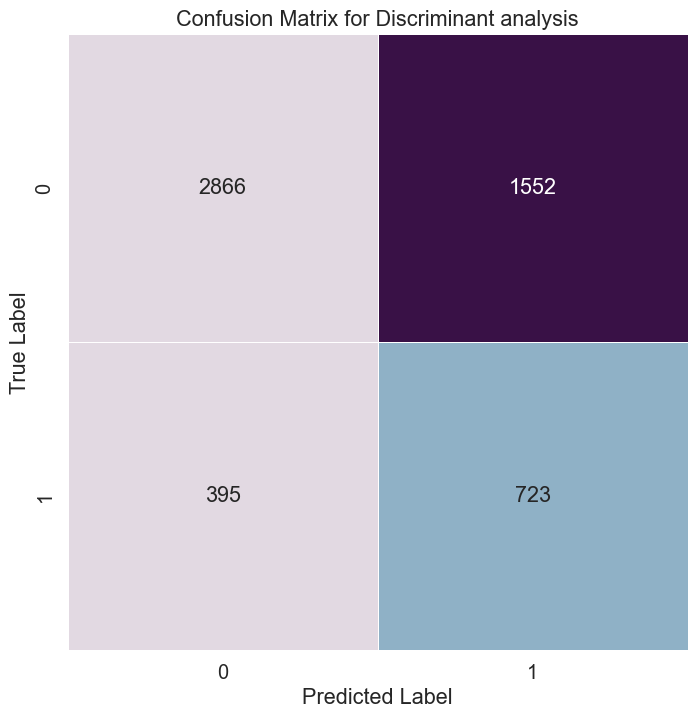

In [100]:
# Plot confusion matrix for lda.
lda_matrix = confusion_matrix(y_test,lda_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(lda_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Discriminant analysis');

For the case the Discriminant analysis the best training set is the simple dataset

### Naive Bayesian

#### Simple training dataset

In [101]:
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred=NB.predict(X_test)
print('training Error for Naive Bayesian '+ ": {:.2f}".format(1-NB.score(X_train,y_train)))
print('validation Error for Naive Bayesian '+ ": {:.2f}".format(1-NB.score(X_test,y_test)))

training Error for Naive Bayesian : 0.48
validation Error for Naive Bayesian : 0.27


In [102]:
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83      4418
         1.0       0.29      0.24      0.26      1118

    accuracy                           0.73      5536
   macro avg       0.55      0.55      0.55      5536
weighted avg       0.71      0.73      0.72      5536



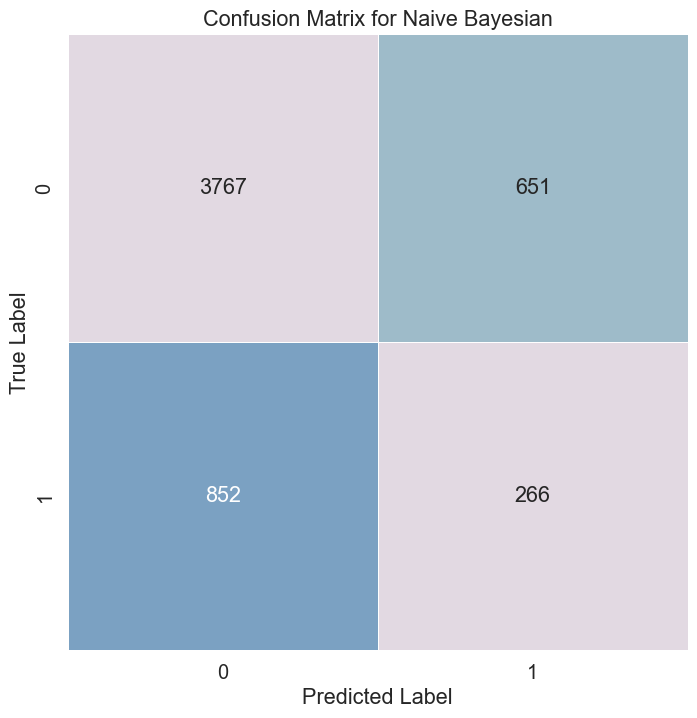

In [103]:
# Plot confusion matrix for NB.
NB_matrix = confusion_matrix(y_test,NB_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(NB_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Naive Bayesian');

#### UpSample dataset

In [104]:
NB = GaussianNB()
NB.fit(X_upsampled, y_upsampled)
NB_pred=NB.predict(X_test)
print('training Error for Naive Bayesian '+ ": {:.2f}".format(1-NB.score(X_upsampled,y_upsampled)))
print('validation Error for Naive Bayesian '+ ": {:.2f}".format(1-NB.score(X_test,y_test)))

training Error for Naive Bayesian : 0.46
validation Error for Naive Bayesian : 0.70


In [105]:
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.14      0.25      4418
         1.0       0.22      0.93      0.35      1118

    accuracy                           0.30      5536
   macro avg       0.56      0.54      0.30      5536
weighted avg       0.76      0.30      0.27      5536



Text(0.5, 1.0, 'Confusion Matrix for Naive Bayesian')

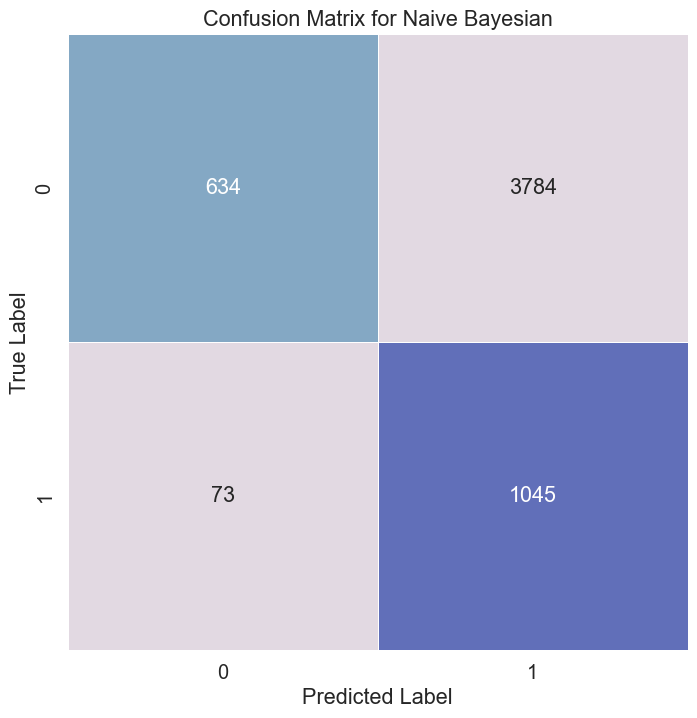

In [106]:
# Plot confusion matrix for NB.
NB_matrix = confusion_matrix(y_test,NB_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(NB_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Naive Bayesian')

#### DownSample dataset

In [107]:
NB = GaussianNB()
NB.fit(X_downsampled, y_downsampled)
NB_pred=NB.predict(X_test)
print('training Error for Naive Bayesian '+ ": {:.2f}".format(1-NB.score(X_downsampled,y_downsampled)))
print('validation Error for Naive Bayesian '+ ": {:.2f}".format(1-NB.score(X_test,y_test)))

training Error for Naive Bayesian : 0.45
validation Error for Naive Bayesian : 0.69


In [108]:
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.15      0.26      4418
         1.0       0.22      0.93      0.35      1118

    accuracy                           0.31      5536
   macro avg       0.55      0.54      0.31      5536
weighted avg       0.75      0.31      0.28      5536



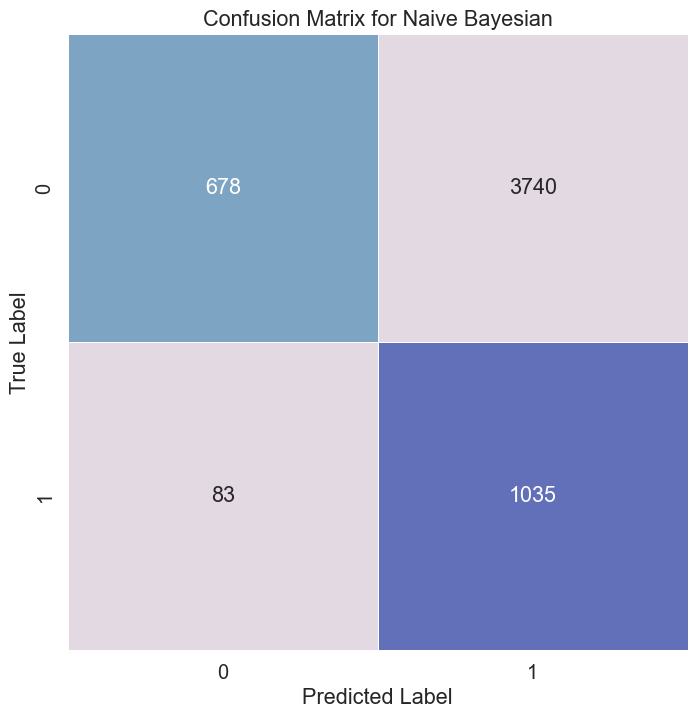

In [109]:
# Plot confusion matrix for NB.
NB_matrix = confusion_matrix(y_test,NB_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(NB_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Naive Bayesian');

For the case the Naive Bayesian the best training set is the simple dataset

### Neural networks

#### Simple training dataset

In [110]:
MLP = MLPClassifier(max_iter=1000)
MLP.fit(X_train, y_train)
MLP_pred=MLP.predict(X_test)
print('training Error for Neural networks '+ ": {:.2f}".format(1-MLP.score(X_train,y_train)))
print('validation Error for Neural networks '+ ": {:.2f}".format(1-MLP.score(X_test,y_test)))

training Error for Neural networks : 0.15
validation Error for Neural networks : 0.24


In [111]:
print(classification_report(y_test,MLP_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86      4418
         1.0       0.23      0.07      0.11      1118

    accuracy                           0.76      5536
   macro avg       0.51      0.51      0.49      5536
weighted avg       0.68      0.76      0.71      5536



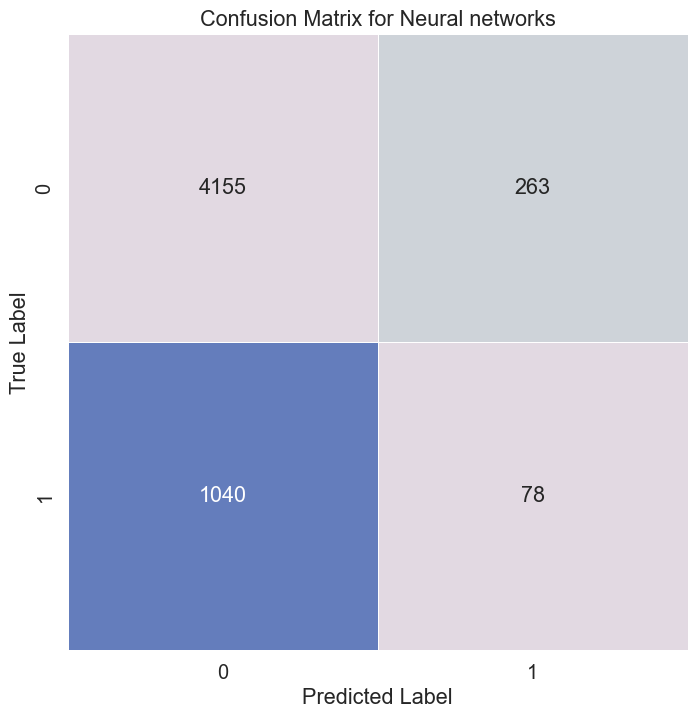

In [112]:
# Plot confusion matrix for NN.
MLP_matrix = confusion_matrix(y_test,MLP_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(MLP_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Neural networks');

#### UpSample dataset

In [113]:
MLP = MLPClassifier(max_iter=1000)
MLP.fit(X_upsampled, y_upsampled)
MLP_pred=MLP.predict(X_test)
print('training Error for Neural networks '+ ": {:.2f}".format(1-MLP.score(X_upsampled,y_upsampled)))
print('validation Error for Neural networks '+ ": {:.2f}".format(1-MLP.score(X_test,y_test)))

training Error for Neural networks : 0.38
validation Error for Neural networks : 0.33


In [114]:
print(classification_report(y_test,MLP_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.71      0.77      4418
         1.0       0.30      0.49      0.37      1118

    accuracy                           0.67      5536
   macro avg       0.57      0.60      0.57      5536
weighted avg       0.74      0.67      0.69      5536



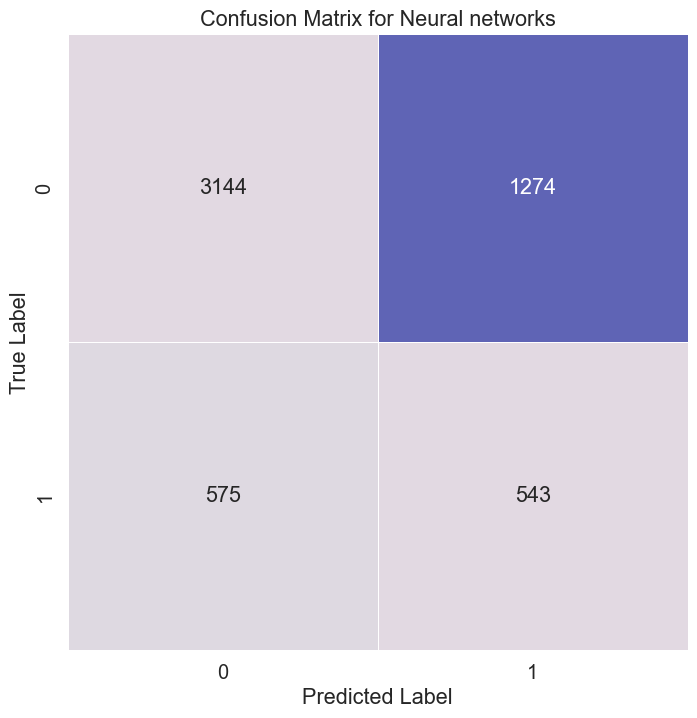

In [115]:
# Plot confusion matrix for lda.
MLP_matrix = confusion_matrix(y_test,MLP_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(MLP_matrix, annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Neural networks');

#### DownSample dataset

In [116]:
MLP = MLPClassifier(max_iter=1000)
MLP.fit(X_downsampled, y_downsampled)
MLP_pred=MLP.predict(X_test)
print('training Error for Neural networks '+ ": {:.2f}".format(1-MLP.score(X_downsampled,y_downsampled)))
print('validation Error for Neural networks '+ ": {:.2f}".format(1-MLP.score(X_test,y_test)))

training Error for Neural networks : 0.43
validation Error for Neural networks : 0.30


In [117]:
print(classification_report(y_test,MLP_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      4418
         1.0       0.27      0.29      0.28      1118

    accuracy                           0.70      5536
   macro avg       0.55      0.55      0.55      5536
weighted avg       0.71      0.70      0.70      5536



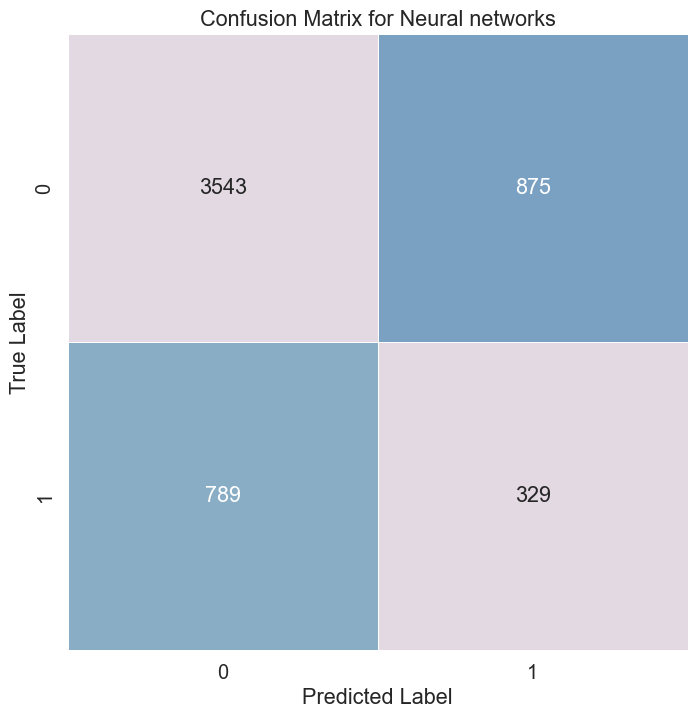

In [118]:
# Plot confusion matrix for lda.
MLP_matrix = confusion_matrix(y_test,MLP_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(MLP_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Neural networks');

For the case the Neural networks the best training set is the upsample dataset

### Classification trees

#### Simple training dataset

In [119]:
CT= DecisionTreeClassifier()
CT.fit(X_train, y_train)
CT_pred=CT.predict(X_test)
print('training Error for Classification trees '+ ": {:.2f}".format(1-CT.score(X_train,y_train)))
print('validation Error for Classification trees '+ ": {:.2f}".format(1-CT.score(X_test,y_test)))

training Error for Classification trees : 0.00
validation Error for Classification trees : 0.46


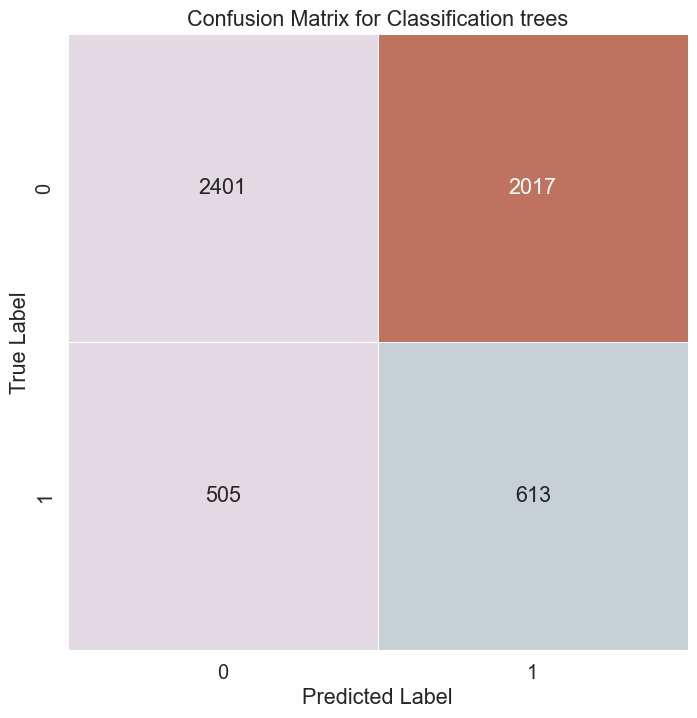

In [120]:
# Plot confusion matrix for CT.
CT_matrix = confusion_matrix(y_test,CT_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(CT_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Classification trees');

#### UpSampled dataset

In [121]:
CT= DecisionTreeClassifier()
CT.fit(X_upsampled, y_upsampled)
CT_pred=CT.predict(X_test)
print('training Error for Classification trees '+ ": {:.2f}".format(1-CT.score(X_upsampled,y_upsampled)))
print('validation Error for Classification trees '+ ": {:.2f}".format(1-CT.score(X_test,y_test)))

training Error for Classification trees : 0.00
validation Error for Classification trees : 0.26


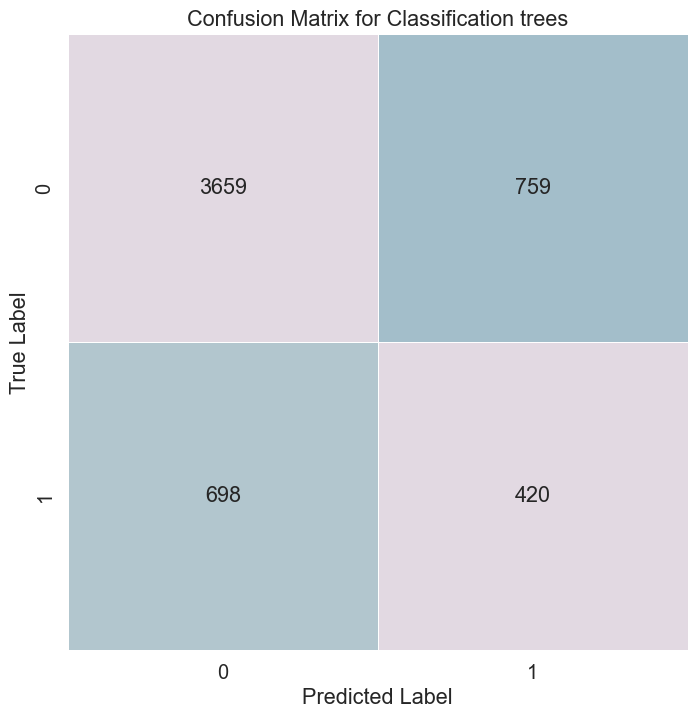

In [122]:
# Plot confusion matrix for CT.
CT_matrix = confusion_matrix(y_test,CT_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(CT_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Classification trees');

#### DownSampled dataset

In [123]:
CT= DecisionTreeClassifier()
CT.fit(X_downsampled, y_downsampled)
CT_pred=CT.predict(X_test)
print('training Error for Classification trees '+ ": {:.2f}".format(1-CT.score(X_downsampled,y_downsampled)))
print('validation Error for Classification trees '+ ": {:.2f}".format(1-CT.score(X_test,y_test)))

training Error for Classification trees : 0.00
validation Error for Classification trees : 0.40


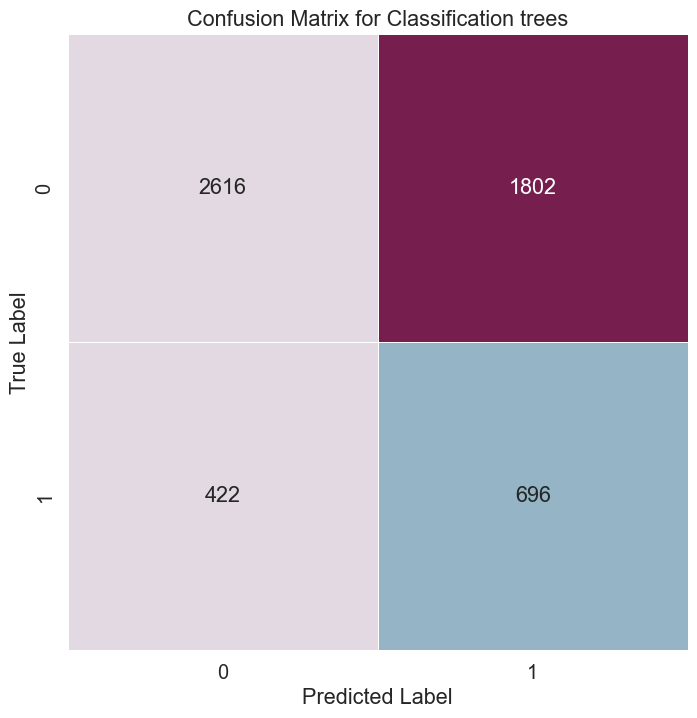

In [124]:
# Plot confusion matrix for CT.
CT_matrix = confusion_matrix(y_test,CT_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(CT_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Classification trees');

For the case the Classification trees we are facing overfitting problem which will make us use the grid search method to find the best parameters 

### GridSearchCV

#### Classification trees

In [125]:
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
grid_tree.fit(X_train, y_train)
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)
0.8283056283185696


In [126]:
CT= DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5)
CT.fit(X_train, y_train)
CT_pred=CT.predict(X_test)
print('training Error for Classification trees '+ ": {:.3f}".format(1-CT.score(X_train,y_train)))
print('validation Error for Classification trees '+ ": {:.3f}".format(1-CT.score(X_test,y_test)))

training Error for Classification trees : 0.173
validation Error for Classification trees : 0.170


In [127]:
print(classification_report(y_test,CT_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      4418
         1.0       0.69      0.29      0.41      1118

    accuracy                           0.83      5536
   macro avg       0.77      0.63      0.65      5536
weighted avg       0.81      0.83      0.80      5536



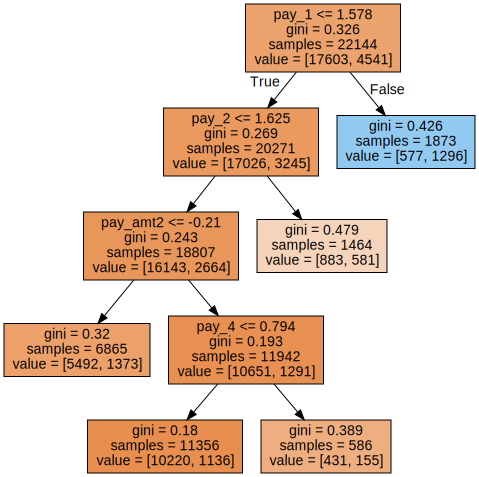

In [128]:
# DOT data
dot_data = tree.export_graphviz(CT, out_file=None, 
                                feature_names=features,  
                                #class_names="default",
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

The new accuracy score for the decision tree model is 0.83

#### logistic regression 

In [129]:
param_grid = {
              'penalty' : ['l1','l2','elasticnet','none'], 
              'C'       : np.logspace(-3,3,7),
              'solver'  : ['newton-cg', 'lbfgs', 'liblinear','sag','saga']}
logreg = LogisticRegression(random_state=42)
grid_lr = GridSearchCV(logreg, 
                   param_grid = param_grid,
                   scoring = 'accuracy', 
                   cv = 5)
grid_lr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [130]:
print(grid_lr.best_estimator_)

LogisticRegression(C=0.001, penalty='none', random_state=42, solver='newton-cg')


In [131]:
#LR
LR = LogisticRegression(penalty='l1', solver='liblinear', C=10,random_state=42)
LR.fit(X_train,y_train)
LR_pred=LR.predict(X_test)
print('training Error for Logistic Regression '+ ": {:.3f}".format(1-LR.score(X_train,y_train)))
print('validation Error for Logistic Regression '+ ": {:.3f}".format(1-LR.score(X_test,y_test)))

training Error for Logistic Regression : 0.180
validation Error for Logistic Regression : 0.202


In [132]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      4418
         1.0       0.00      0.00      0.00      1118

    accuracy                           0.80      5536
   macro avg       0.40      0.50      0.44      5536
weighted avg       0.64      0.80      0.71      5536



The new accuracy score for the logistic regression model is 0.82

#### Neural Network

In [142]:

param_grid = {
    'solver': ['sgd', 'adam'], 
    'max_iter': [1000], 
    'alpha': 10.0 ** -np.arange(1, 4), 
    'hidden_layer_sizes':[(10,),(20,),(40,)]}
MLP = MLPClassifier()
grid_mlp= GridSearchCV(MLP, 
                   param_grid = param_grid,
                   scoring = 'accuracy', 
                   cv = 3,
                   verbose=3)
grid_mlp.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, solver=sgd;, score=0.828 total time=   1.6s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, solver=sgd;, score=0.825 total time=   1.6s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, solver=sgd;, score=0.824 total time=   1.2s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, solver=adam;, score=0.829 total time=   1.2s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, solver=adam;, score=0.826 total time=   1.6s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000, solver=adam;, score=0.825 total time=   1.4s
[CV 1/3] END alpha=0.1, hidden_layer_sizes=(20,), max_iter=1000, solver=sgd;, score=0.827 total time=   1.6s
[CV 2/3] END alpha=0.1, hidden_layer_sizes=(20,), max_iter=1000, solver=sgd;, score=0.826 total time=   2.6s
[CV 3/3] END alpha=0.1, hidden_layer_sizes=(20,), max_iter=1000,

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'alpha': array([0.1  , 0.01 , 0.001]),
                         'hidden_layer_sizes': [(10,), (20,), (40,)],
                         'max_iter': [1000], 'solver': ['sgd', 'adam']},
             scoring='accuracy', verbose=3)

In [143]:
print(grid_mlp.best_estimator_)
print(np.abs(grid_mlp.best_score_))

MLPClassifier(alpha=0.001, hidden_layer_sizes=(20,), max_iter=1000)
0.8269958845984391


In [144]:
MLP_pred=grid_mlp.predict(X_test)
print(classification_report(y_test,MLP_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.96      0.88      4418
         1.0       0.30      0.07      0.11      1118

    accuracy                           0.78      5536
   macro avg       0.55      0.51      0.49      5536
weighted avg       0.70      0.78      0.72      5536



In [151]:
#MLP=MLPClassifier(activation='logistic',hidden_layer_sizes=13,max_iter=700,random_state=2,solver='adam',alpha=0.0001)
MLP=MLPClassifier(activation='logistic',hidden_layer_sizes=20,max_iter=1000,random_state=2,solver='adam',alpha=0.001)
MLP.fit(X_train,y_train)
print(MLP.score(X_test,y_test))
print(MLP.score(X_train,y_train))

0.758128612716763
0.8320086705202312


The new accuracy score for the Neural Network model is 0.76

#### AdaBoost

In [152]:
param_grid= {
        'algorithm': ['SAMME','SAMME.R'],
    'n_estimators': [10,50,100,500],
    'learning_rate': [0.1, 0.01, 0.001,0.0001,1.0]
        }
ada = AdaBoostClassifier()
grid_ada=GridSearchCV(ada,param_grid,cv=5)
grid_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001, 0.0001, 1.0],
                         'n_estimators': [10, 50, 100, 500]})

In [153]:
print(grid_ada.best_estimator_)
print(np.abs(grid_ada.best_score_))

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=10)
0.8274025001106488


In [154]:
ada=AdaBoostClassifier(learning_rate=0.1,algorithm='SAMME',n_estimators=10)
ada.fit(X_train, y_train)
ada_pred=ada.predict(X_test)
print(ada.score(X_train, y_train))
print(ada.score(X_test, y_test))

0.8274024566473989
0.8303829479768786


In [155]:
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      4418
         1.0       0.69      0.29      0.41      1118

    accuracy                           0.83      5536
   macro avg       0.77      0.63      0.65      5536
weighted avg       0.81      0.83      0.80      5536



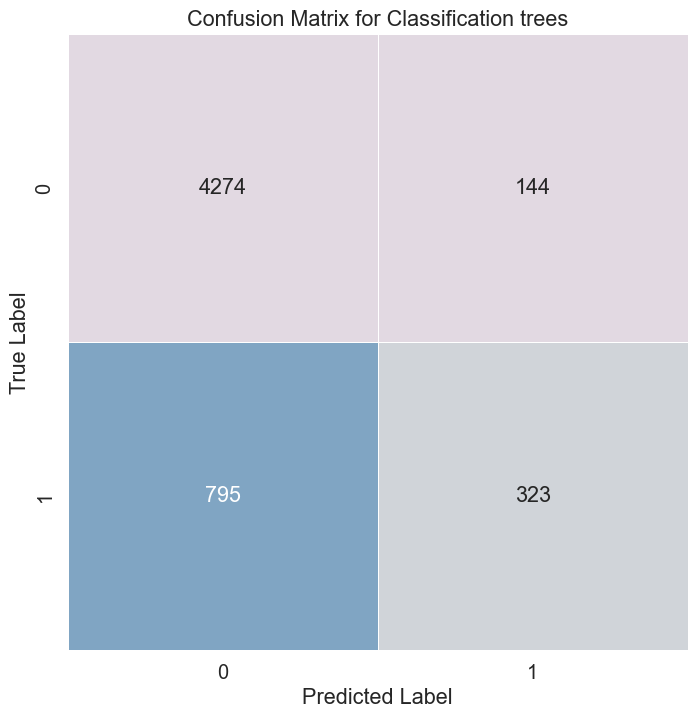

In [156]:
# Plot confusion matrix for ada.
lda_matrix = confusion_matrix(y_test,ada_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(lda_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Classification trees');

The accuracy score for the Adaboost model is 0.833

#### XGBoost

In [157]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [158]:
param_grid_XG = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

# Pass use_label_encoder=False to avoid related errors
model = XGBClassifier()
gridxg = GridSearchCV(model, param_grid_XG, cv=5)
gridxg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)})

In [159]:
print(gridxg.best_estimator_)
print(np.abs(gridxg.best_score_))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=60, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
0.8288475725503849


In [164]:
xg=XGBClassifier(learning_rate=0.05,max_depth=2,n_estimators=60,tree_method="gpu_hist", enable_categorical=False)
xg.fit(X_train, y_train)
print(xg.score(X_train, y_train))
print(xg.score(X_test, y_test))
y_pred_xg=xg.predict(X_train)




0.829073338150289
0.7980491329479769


The accuracy score for the XGBoost model is 0.831

## V. Evaluation


In [165]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
#knn
y_score_knn=knn.predict_proba(X_test)
fpr_knn,tpr_knn,theshold_knn=roc_curve(y_test,y_score_knn[:,1])
roc_auc_knn=auc(fpr_knn,tpr_knn)
#LR
y_score_lr=LR.predict_proba(X_test)
fpr_lr,tpr_lr,theshold_lr=roc_curve(y_test,y_score_lr[:,1])
roc_auc_lr=auc(fpr_lr,tpr_lr)
#DA
y_score_lda=lda.predict_proba(X_test)
fpr_lda,tpr_lda,theshold_lda=roc_curve(y_test,y_score_lda[:,1])
roc_auc_lda=auc(fpr_lda,tpr_lda)
#NB
y_score_nb=NB.predict_proba(X_test)
fpr_nb,tpr_nb,theshold_nb=roc_curve(y_test,y_score_nb[:,1])
roc_auc_nb=auc(fpr_nb,tpr_nb)
#NN
y_score_mlp=MLP.predict_proba(X_test)
fpr_mlp,tpr_mlp,theshold_mpl=roc_curve(y_test,y_score_mlp[:,1])
roc_auc_mlp=auc(fpr_mlp,tpr_mlp)
#CT
y_score_ct=CT.predict_proba(X_test)
fpr_ct,tpr_ct,theshold_ct=roc_curve(y_test,y_score_ct[:,1])
roc_auc_ct=auc(fpr_ct,tpr_ct)
#ADA
y_score_ada=ada.predict_proba(X_test)
fpr_ada,tpr_ada,theshold_ada=roc_curve(y_test,y_score_ada[:,1])
roc_auc_ada=auc(fpr_ada,tpr_ada)
#XGBOOST
y_score_xg=xg.predict_proba(X_test)
fpr_xg,tpr_xg,theshold_xg=roc_curve(y_test,y_score_xg[:,1])
roc_auc_xg=auc(fpr_xg,tpr_xg)

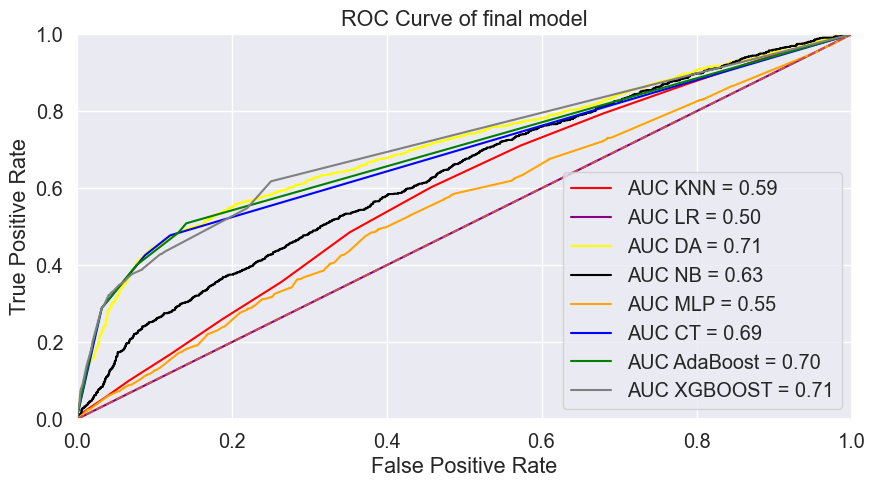

In [166]:
plt.figure(figsize=(10,5))
plt.plot(fpr_knn,tpr_knn, 'red', label = 'AUC KNN = %0.2f' % roc_auc_knn)
plt.plot(fpr_lr,tpr_lr, 'purple', label = 'AUC LR = %0.2f' % roc_auc_lr)
plt.plot(fpr_lda,tpr_lda, 'yellow', label = 'AUC DA = %0.2f' % roc_auc_lda)
plt.plot(fpr_nb,tpr_nb, 'black', label = 'AUC NB = %0.2f' % roc_auc_nb)
plt.plot(fpr_mlp,tpr_mlp, 'orange', label = 'AUC MLP = %0.2f' % roc_auc_mlp)
plt.plot(fpr_ct,tpr_ct, 'blue', label = 'AUC CT = %0.2f' % roc_auc_ct)
plt.plot(fpr_ada,tpr_ada, 'green', label = 'AUC AdaBoost = %0.2f' % roc_auc_ada)
plt.plot(fpr_xg,tpr_xg, 'grey', label = 'AUC XGBOOST = %0.2f' % roc_auc_xg)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

As a conclusion the best model we can use to predict if the client will default the next month or not is the XGBoost model in the next section we will try to use this model to predict if a new client will default or not 

 ## VI. Deploiement (optionnel)

In [167]:
df_dep

,ID,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000.0,1,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,1,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,1,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,1,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,0,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,29995,80000.0,0,2,2,34,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29995,29996,220000.0,0,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,0,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,29999,80000.0,0,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [168]:
#get dummies for education and marriage
df_dc1 = pd.get_dummies(df_dep, columns=['education','marriage'],drop_first=True)
df_dc1

,ID,limit_bal,sex,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,...,pay_amt4,pay_amt5,pay_amt6,default,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3
0,1,20000.0,1,24,2,2,-1,-1,-2,-2,...,0.0,0.0,0.0,1,True,False,False,True,False,False
1,2,120000.0,1,26,-1,2,0,0,0,2,...,1000.0,0.0,2000.0,1,True,False,False,False,True,False
2,3,90000.0,1,34,0,0,0,0,0,0,...,1000.0,1000.0,5000.0,0,True,False,False,False,True,False
3,4,50000.0,1,37,0,0,0,0,0,0,...,1100.0,1069.0,1000.0,0,True,False,False,True,False,False
4,5,50000.0,0,57,-1,0,-1,0,0,0,...,9000.0,689.0,679.0,0,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,29995,80000.0,0,34,2,2,2,2,2,2,...,7000.0,0.0,4000.0,1,True,False,False,False,True,False
29995,29996,220000.0,0,39,0,0,0,0,0,0,...,3047.0,5000.0,1000.0,0,False,True,False,True,False,False
29996,29997,150000.0,0,43,-1,-1,-1,-1,0,0,...,129.0,0.0,0.0,0,False,True,False,False,True,False
29998,29999,80000.0,0,41,1,-1,0,0,0,-1,...,1926.0,52964.0,1804.0,1,False,True,False,True,False,False


In [169]:
features=['limit_bal', 'sex', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5',
       'pay_amt6', 'bill_amt1', 'bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6', 'education_2',
       'education_3', 'education_4', 'marriage_1', 'marriage_2', 'marriage_3']
y = df_dc1['default'].copy() # target
X = df_dc1[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [170]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)
df_train.sample(10)

,limit_bal,sex,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt1,...,bill_amt4,bill_amt5,bill_amt6,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3,default
4892,50000.0,1,47,0,0,0,0,0,0,1900.0,...,8941.0,9893.0,6181.0,True,False,False,True,False,False,0
7251,20000.0,0,39,0,0,0,0,0,0,1258.0,...,16512.0,16858.0,17193.0,True,False,False,False,True,False,0
15482,20000.0,0,39,0,0,-1,0,0,0,1300.0,...,19939.0,15110.0,0.0,False,True,False,True,False,False,0
11008,70000.0,0,40,1,2,2,2,2,2,2000.0,...,14299.0,13927.0,15692.0,False,False,False,True,False,False,0
16752,140000.0,0,49,0,0,0,0,0,0,1590.0,...,37933.0,38522.0,38519.0,True,False,False,True,False,False,0
10877,80000.0,1,26,0,0,2,0,0,0,4100.0,...,44143.0,45079.0,45977.0,False,True,False,False,True,False,0
14229,140000.0,1,30,0,0,0,0,0,0,2000.0,...,14869.0,12895.0,12833.0,True,False,False,True,False,False,0
18760,200000.0,1,28,-1,-1,2,-1,-1,-1,26286.0,...,1117.0,1117.0,0.0,False,False,False,False,True,False,0
3042,380000.0,0,38,-2,-2,-2,-1,-1,-2,0.0,...,2086.0,0.0,4069.0,True,False,False,True,False,False,0
23856,90000.0,0,31,2,0,0,0,0,0,2500.0,...,28790.0,29087.0,28941.0,False,False,False,False,True,False,1


In [171]:
from sklearn.tree import DecisionTreeClassifier
XGBoost= DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5)
CT.fit(X_train, y_train)
CT_pred=CT.predict(X_test)
print('training Error for Classification trees '+ ": {:.3f}".format(1-CT.score(X_train,y_train)))
print('validation Error for Classification trees '+ ": {:.3f}".format(1-CT.score(X_test,y_test)))

training Error for Classification trees : 0.174
validation Error for Classification trees : 0.166


In [172]:
#ExPORT THE MODEL
import pickle 
filename = "trainned_model.sav"
pickle.dump(XGBoost , open(filename,'wb'))